# Retail Transactions analytics (Datashelf)

This dataset was created to simulate a market basket dataset, providing insights into customer purchasing behavior and store operations. The dataset facilitates market basket analysis, customer segmentation, and other retail analytics tasks. Here's more information about the context and inspiration behind this dataset:

Retail businesses, from supermarkets to convenience stores, are constantly seeking ways to better understand their customers and improve their operations. Market basket analysis, a technique used in retail analytics, explores customer purchase patterns to uncover associations between products, identify trends, and optimize pricing and promotions. Customer segmentation allows businesses to tailor their offerings to specific groups, enhancing the customer experience.

The inspiration for this dataset comes from the need for accessible and customizable market basket datasets. While real-world retail data is sensitive and often restricted, synthetic datasets offer a safe and versatile alternative. Researchers, data scientists, and analysts can use this dataset to develop and test algorithms, models, and analytical tools.

Powered by [Kaggle](https://www.kaggle.com/datasets/prasad22/retail-transactions-dataset)

In [109]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from wordcloud import WordCloud

import random
import calendar
from collections import Counter
import ast
import warnings

In [110]:
warnings.filterwarnings('ignore')

In [111]:
%matplotlib inline

In [112]:
DATA_PATH = './data'
DATASET_PATH = f'{DATA_PATH}/retail_transactions_dataset.csv'

In [113]:
df = pd.read_csv(DATASET_PATH)

df.head(5)

Transaction_ID                 Date      Customer_Name  \
0      1000000000  2022-01-21 06:27:29       Stacey Price   
1      1000000001  2023-03-01 13:01:21   Michelle Carlson   
2      1000000002  2024-03-21 15:37:04        Lisa Graves   
3      1000000003  2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004  2020-12-10 00:59:59     Susan Mitchell   

                                             Product  Total_Items  Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
2                                        ['Spinach']            6       41.49   
3                             ['Tissues', 'Mustard']            1       39.34   
4                                      ['Dish Soap']           10       16.42   

   Payment_Method           City        Store_Type  Discount_Applied  \
0  Mobile Payment    Los Angeles    Warehouse Club              True   
1            Cash  San Francisco   Specialty Store              True   
2     Credit Card        Houston  Department Store              True   
3  Mobile Payment        Chicago          Pharmacy              True   
4      Debit Card        Houston   Specialty Store             False   

  Customer_Category  Season                   Promotion  
0         Homemaker  Winter                         NaN  
1      Professional    Fall      BOGO (Buy One Get One)  
2      Professional  Winter                         NaN  
3         Homemaker  Spring                         NaN  
4       Young Adult  Winter  Discount on Selected Items

In [ ]:
n = 200_000

product_pool = [
    'Milk', 'Bread', 'Butter', 'Cheese', 'Chicken', 'Beef', 'Fish',
    'Eggs', 'Toothpaste', 'Soap', 'Shampoo', 'BBQ Sauce', 'Soda',
    'Water', 'Olive Oil', 'Pancake Mix', 'Syrup', 'Ice Cream', 'Honey'
]

payment_methods = ['Cash', 'Credit Card', 'Debit Card', 'Mobile Payment']
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'San Francisco', 'Boston']
store_types = ['Supermarket', 'Convenience Store', 'Specialty Store']
customer_categories = ['Student', 'Young Adult', 'Professional', 'Retiree']
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
promotions = ['BOGO (Buy One Get One)', 'Discount on Selected Items', 'Free Gift', 'None']

first_names = ['Alex', 'Taylor', 'Jordan', 'Morgan', 'Casey', 'Jamie', 'Riley', 'Chris', 'Drew', 'Cameron']
last_names = ['Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Garcia', 'Miller', 'Davis', 'Rodriguez', 'Martinez']

def random_name():
    return f"{random.choice(first_names)} {random.choice(last_names)}"

new_data = pd.DataFrame({
    'Transaction_ID': np.arange(1001000000, 1001000000 + n),
    'Date': pd.to_datetime(np.random.randint(
        pd.Timestamp("2020-01-01").value // 10**9,
        pd.Timestamp("2024-12-31").value // 10**9,
        n), unit='s'),
    'Customer_Name': [random_name() for _ in range(n)],
    'Product': [str(random.sample(product_pool, random.randint(1, 5))) for _ in range(n)],
    'Total_Items': np.random.randint(1, 11, n),
    'Total_Cost': np.round(np.random.uniform(5, 200, n), 2),
    'Payment_Method': np.random.choice(payment_methods, n),
    'City': np.random.choice(cities, n),
    'Store_Type': np.random.choice(store_types, n),
    'Discount_Applied': np.random.choice([True, False], n, p=[0.4, 0.6]),
    'Customer_Category': np.random.choice(customer_categories, n),
    'Season': np.random.choice(seasons, n),
    'Promotion': np.random.choice(promotions, n),
})

In [115]:
df = pd.concat([df, new_data], ignore_index=True)

### Understanding data

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1200000 non-null  int64  
 1   Date               1200000 non-null  object 
 2   Customer_Name      1200000 non-null  object 
 3   Product            1200000 non-null  object 
 4   Total_Items        1200000 non-null  int64  
 5   Total_Cost         1200000 non-null  float64
 6   Payment_Method     1200000 non-null  object 
 7   City               1200000 non-null  object 
 8   Store_Type         1200000 non-null  object 
 9   Discount_Applied   1200000 non-null  bool   
 10  Customer_Category  1200000 non-null  object 
 11  Season             1200000 non-null  object 
 12  Promotion          866057 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 111.0+ MB


In [117]:
df.size

15600000

In [118]:
df.isna().sum()

Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64

In [119]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 1200000
Number of columns: 13


In [120]:
Null_values = df.isnull().sum()
Null_values

Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64

In [121]:
df_cleaned = df[df['Promotion'].notna()]

print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

df_cleaned.head()

Original dataset shape: (1200000, 13)
Cleaned dataset shape: (866057, 13)


Transaction_ID                 Date     Customer_Name  \
1      1000000001  2023-03-01 13:01:21  Michelle Carlson   
4      1000000004  2020-12-10 00:59:59    Susan Mitchell   
5      1000000005  2021-10-07 12:37:26    Joshua Frazier   
6      1000000006  2023-01-08 10:40:03  Victoria Garrett   
7      1000000007  2020-09-03 12:39:59     Sydney Waller   

                                             Product  Total_Items  Total_Cost  \
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
4                                      ['Dish Soap']           10       16.42   
5                          ['Toothpaste', 'Chicken']            3       72.24   
6  ['Honey', 'BBQ Sauce', 'Soda', 'Olive Oil', 'G...            4        5.28   
7  ['Syrup', 'Trash Cans', 'Pancake Mix', 'Water'...            5       21.77   

  Payment_Method           City       Store_Type  Discount_Applied  \
1           Cash  San Francisco  Specialty Store              True   
4     Debit Card        Houston  Specialty Store             False   
5           Cash        Houston      Supermarket              True   
6           Cash         Boston  Specialty Store             False   
7     Debit Card        Chicago  Specialty Store             False   

  Customer_Category  Season                   Promotion  
1      Professional    Fall      BOGO (Buy One Get One)  
4       Young Adult  Winter  Discount on Selected Items  
5           Retiree  Spring  Discount on Selected Items  
6           Student  Summer  Discount on Selected Items  
7       Young Adult  Winter  Discount on Selected Items

In [122]:
df = df[df['Promotion'].notna()]

df

Transaction_ID                 Date     Customer_Name  \
1            1000000001  2023-03-01 13:01:21  Michelle Carlson   
4            1000000004  2020-12-10 00:59:59    Susan Mitchell   
5            1000000005  2021-10-07 12:37:26    Joshua Frazier   
6            1000000006  2023-01-08 10:40:03  Victoria Garrett   
7            1000000007  2020-09-03 12:39:59     Sydney Waller   
...                 ...                  ...               ...   
1199995      1001199995  2020-07-11 15:58:29      Morgan Jones   
1199996      1001199996  2020-03-01 17:46:41  Morgan Rodriguez   
1199997      1001199997  2021-07-02 03:00:40     Cameron Davis   
1199998      1001199998  2022-08-21 16:34:11   Jamie Rodriguez   
1199999      1001199999  2021-04-16 18:29:51   Casey Rodriguez   

                                                   Product  Total_Items  \
1        ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2   
4                                            ['Dish Soap']           10   
5                                ['Toothpaste', 'Chicken']            3   
6        ['Honey', 'BBQ Sauce', 'Soda', 'Olive Oil', 'G...            4   
7        ['Syrup', 'Trash Cans', 'Pancake Mix', 'Water'...            5   
...                                                    ...          ...   
1199995                                    ['Pancake Mix']            1   
1199996       ['Olive Oil', 'Eggs', 'Soap', 'Pancake Mix']            6   
1199997                         ['BBQ Sauce', 'Ice Cream']            7   
1199998                                  ['Syrup', 'Eggs']            2   
1199999                       ['Milk', 'Shampoo', 'Bread']            7   

         Total_Cost Payment_Method           City         Store_Type  \
1             25.93           Cash  San Francisco    Specialty Store   
4             16.42     Debit Card        Houston    Specialty Store   
5             72.24           Cash        Houston        Supermarket   
6              5.28           Cash         Boston    Specialty Store   
7             21.77     Debit Card        Chicago    Specialty Store   
...             ...            ...            ...                ...   
1199995       17.12     Debit Card    Los Angeles  Convenience Store   
1199996       97.72     Debit Card  San Francisco        Supermarket   
1199997      115.95     Debit Card  San Francisco  Convenience Store   
1199998      124.29           Cash       New York        Supermarket   
1199999      183.47     Debit Card       New York    Specialty Store   

         Discount_Applied Customer_Category  Season  \
1                    True      Professional    Fall   
4                   False       Young Adult  Winter   
5                    True           Retiree  Spring   
6                   False           Student  Summer   
7                   False       Young Adult  Winter   
...                   ...               ...     ...   
1199995             False      Professional  Spring   
1199996              True       Young Adult  Summer   
1199997             False           Retiree  Winter   
1199998              True           Retiree    Fall   
1199999             False           Retiree    Fall   

                          Promotion  
1            BOGO (Buy One Get One)  
4        Discount on Selected Items  
5        Discount on Selected Items  
6        Discount on Selected Items  
7        Discount on Selected Items  
...                             ...  
1199995      BOGO (Buy One Get One)  
1199996  Discount on Selected Items  
1199997      BOGO (Buy One Get One)  
1199998      BOGO (Buy One Get One)  
1199999      BOGO (Buy One Get One)  

[866057 rows x 13 columns]

### Data cleaning

In [123]:
df.duplicated().sum()

np.int64(0)

In [124]:
df[-df.duplicated()].shape[0]

866057

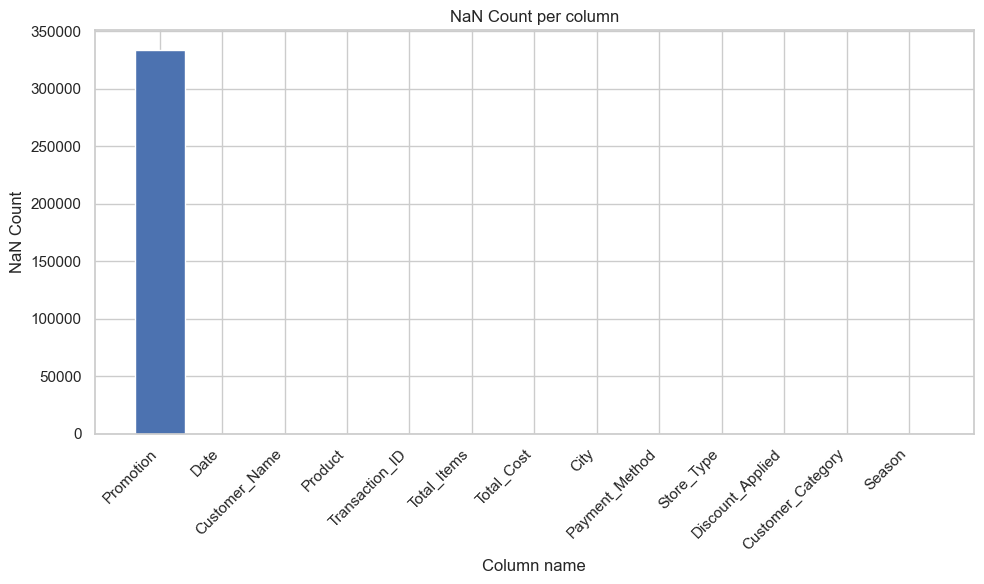

In [125]:
Null_values_sorted = Null_values.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(Null_values_sorted.index, Null_values_sorted.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Column name')
plt.ylabel('NaN Count')
plt.title('NaN Count per column')
plt.tight_layout()

plt.show()

### Data visualization

In [126]:
df['Total_Items'] = pd.to_numeric(df['Total_Items'])
df['Total_Cost'] = pd.to_numeric(df['Total_Cost'])

df.columns

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Items',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'],
      dtype='object')

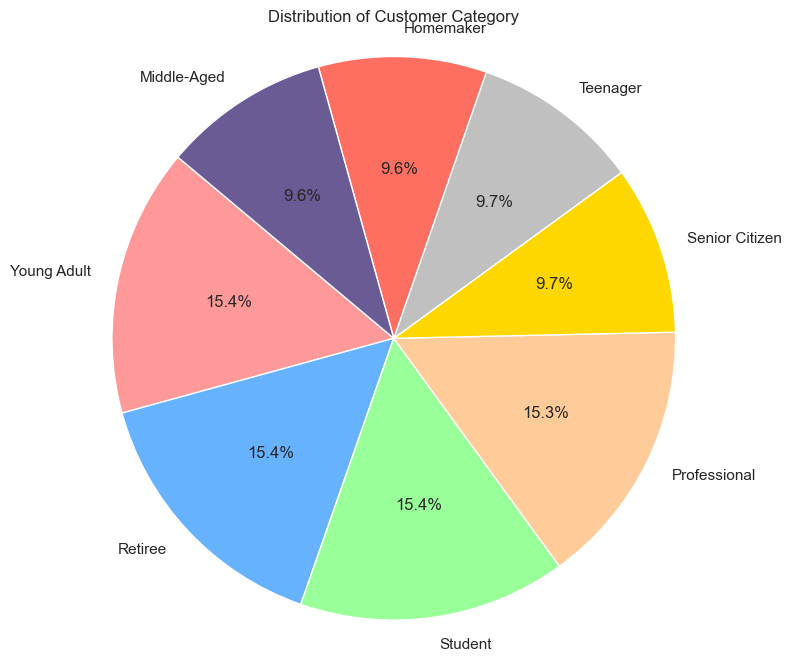

In [127]:
category_counts = df['Customer_Category'].value_counts().reset_index()
category_counts.columns = ['Customer_Category', 'Count']

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#C0C0C0', '#FF6F61', '#6B5B95']

plt.figure(figsize=(8, 8))
plt.pie(
    category_counts['Count'], 
    labels=category_counts['Customer_Category'], 
    colors=colors[:len(category_counts)],
    autopct='%1.1f%%', 
    startangle=140
)
plt.title('Distribution of Customer Category')
plt.axis('equal')
plt.show()

In [210]:
category_counts = df['Customer_Category'].value_counts().reset_index()
category_counts.columns = ['Customer_Category', 'Count']

print(category_counts['Count'])
print(category_counts['Customer_Category'])

0    125485
1    125418
2    125319
3    125072
4    124842
5    124651
6    124636
7    124577
Name: Count, dtype: int64
0    Senior Citizen
1         Homemaker
2          Teenager
3           Retiree
4           Student
5      Professional
6       Middle-Aged
7       Young Adult
Name: Customer_Category, dtype: object


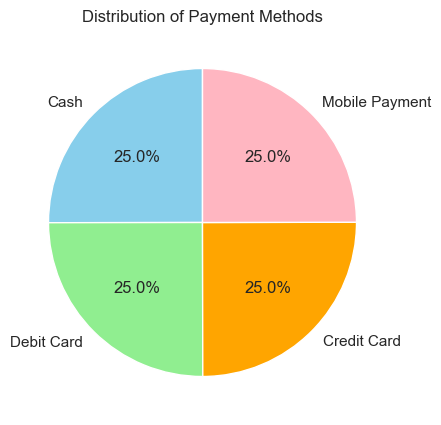

In [211]:
payment_counts = df['Payment_Method'].value_counts()

plt.figure(figsize=(5, 5))
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange','lightpink'])
plt.title('Distribution of Payment Methods')
plt.ylabel('')
plt.show()

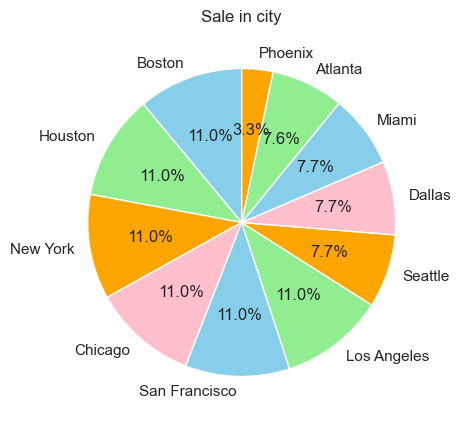

In [129]:
category_counts = df['City'].value_counts()

plt.figure(figsize=(5,5))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.title('Sale in city')
plt.ylabel('')
plt.show()

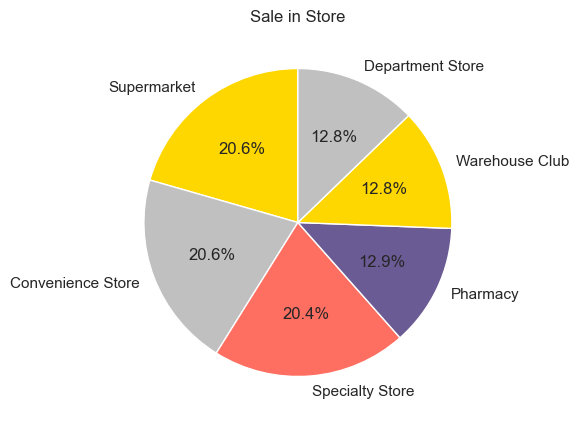

In [130]:
category_counts = df['Store_Type'].value_counts()

plt.figure(figsize=(5,5))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FFD700', '#C0C0C0', '#FF6F61', '#6B5B95'])
plt.title('Sale in Store')
plt.ylabel('')
plt.show()

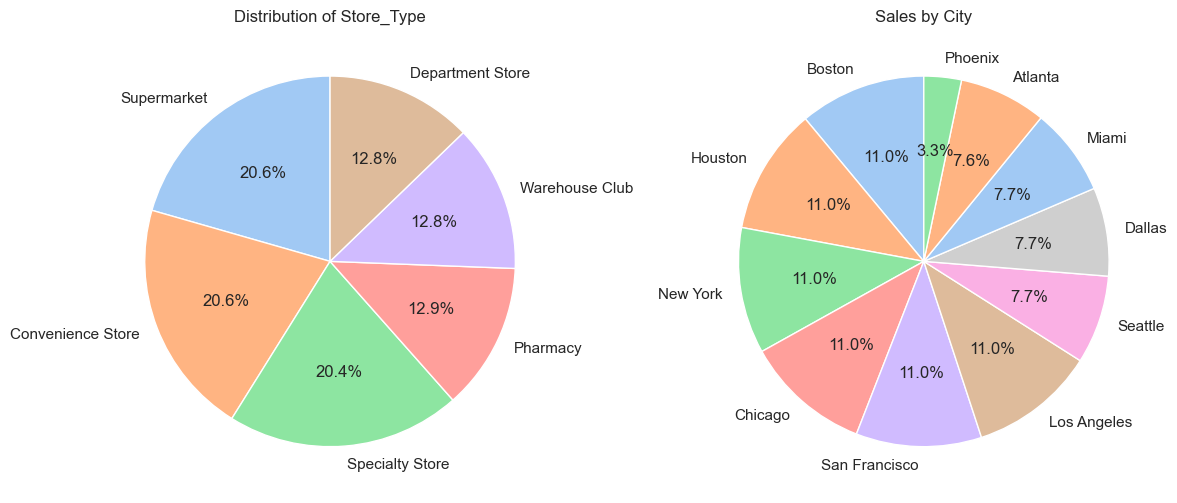

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

colors = sns.color_palette('pastel', n_colors=8)

Store_Type_counts = df['Store_Type'].value_counts()
axes[0].pie(
    Store_Type_counts, 
    labels=Store_Type_counts.index,
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors
)
axes[0].set_title('Distribution of Store_Type')

city_counts = df['City'].value_counts()
axes[1].pie(
    city_counts, 
    labels=city_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors
)
axes[1].set_title('Sales by City')

plt.tight_layout()
plt.show()

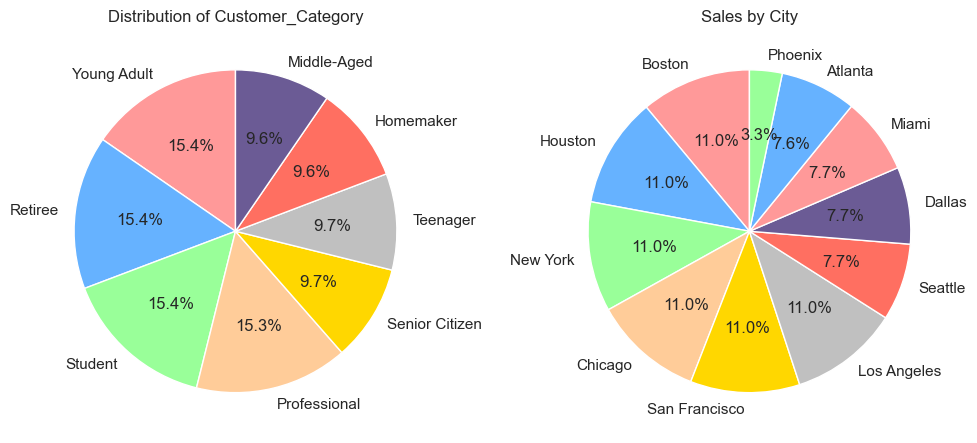

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#C0C0C0', '#FF6F61', '#6B5B95']

customer_category_counts = df['Customer_Category'].value_counts()
axes[0].pie(customer_category_counts, labels=customer_category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Distribution of Customer_Category')

city_counts = df['City'].value_counts()
axes[1].pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Sales by City')

plt.tight_layout()
plt.show()

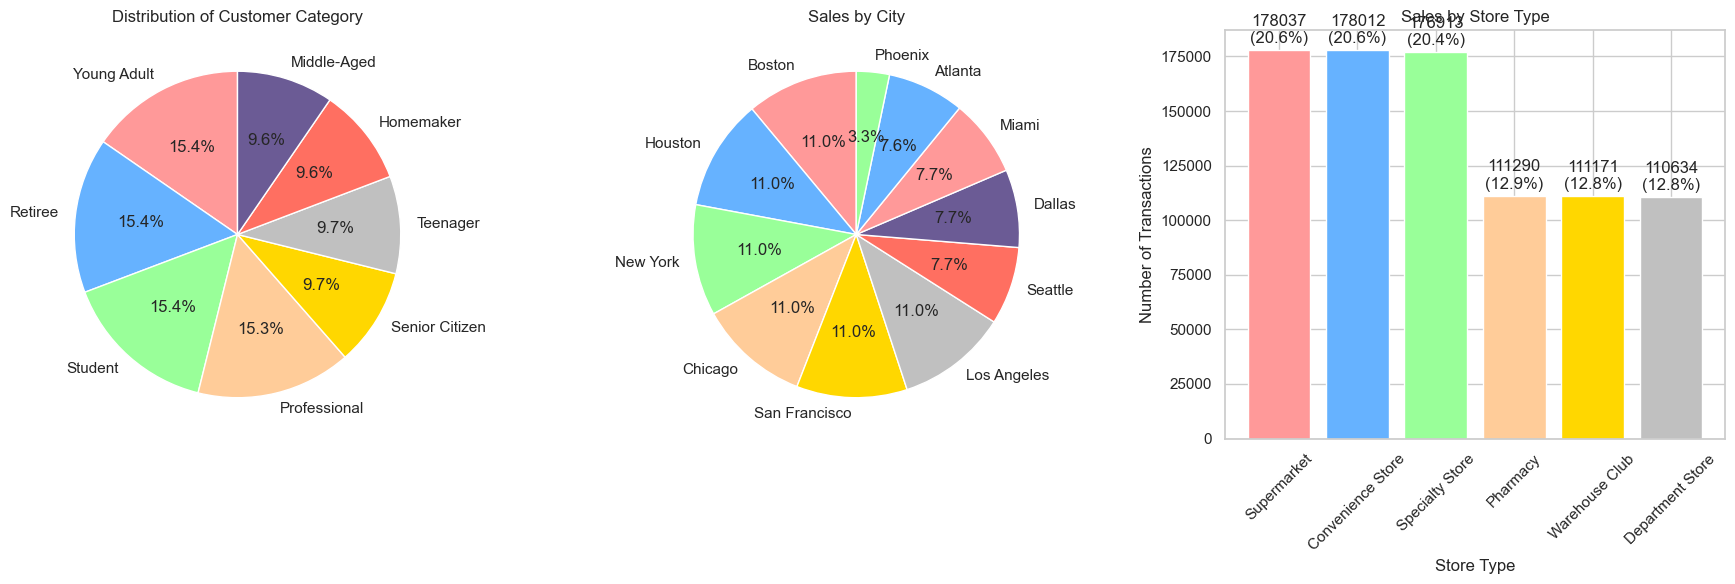

In [133]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#C0C0C0', '#FF6F61', '#6B5B95']

customer_category_counts = df['Customer_Category'].value_counts()
axes[0].pie(
    customer_category_counts, 
    labels=customer_category_counts.index,
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors
)
axes[0].set_title('Distribution of Customer Category')

city_counts = df['City'].value_counts()
axes[1].pie(
    city_counts, 
    labels=city_counts.index,
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors
)
axes[1].set_title('Sales by City')

store_type_counts = df['Store_Type'].value_counts()
axes[2].bar(store_type_counts.index, store_type_counts, color=colors[:len(store_type_counts)])

axes[2].set_title('Sales by Store Type')
axes[2].set_xlabel('Store Type')
axes[2].set_ylabel('Number of Transactions')
axes[2].tick_params(axis='x', rotation=45)

for i, value in enumerate(store_type_counts):
    axes[2].text(
        i, value + 0.01 * store_type_counts.max(),  
        f'{value}\n({(value/store_type_counts.sum())*100:.1f}%)', 
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

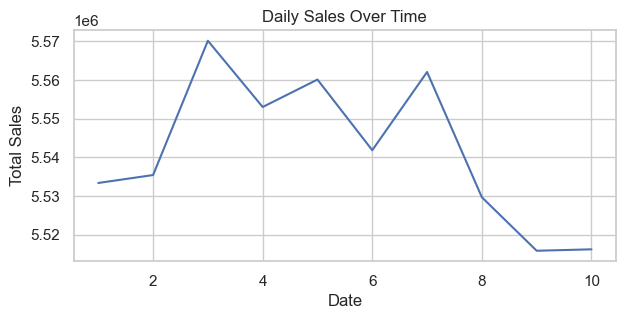

In [134]:
daily_sales = df.groupby('Total_Items')['Total_Cost'].sum()

plt.figure(figsize=(7, 3))
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

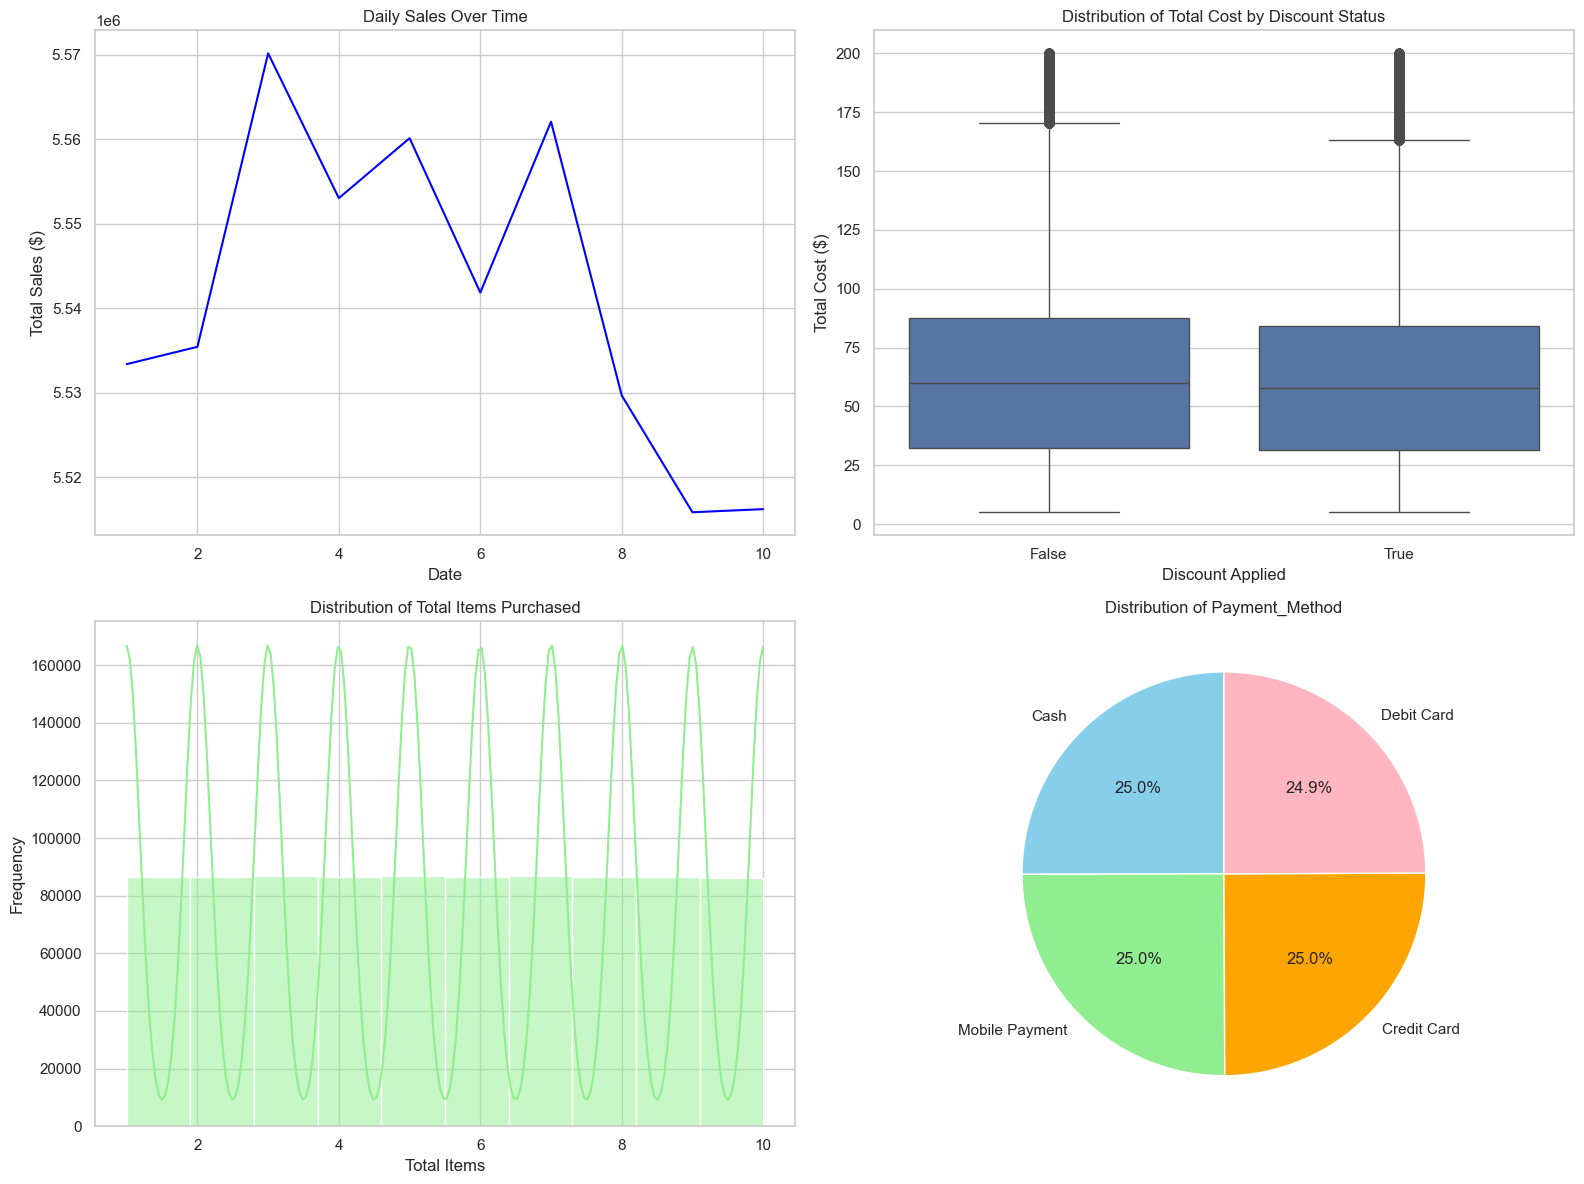

In [135]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

daily_sales.plot(kind='line', color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Daily Sales Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Total Sales ($)')

sns.boxplot(data=df, x='Discount_Applied', y='Total_Cost', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Total Cost by Discount Status')
axes[0, 1].set_xlabel('Discount Applied')
axes[0, 1].set_ylabel('Total Cost ($)')

sns.histplot(df['Total_Items'], bins=10, kde=True, color='lightgreen', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Total Items Purchased')
axes[1, 0].set_xlabel('Total Items')
axes[1, 0].set_ylabel('Frequency')

Payment_Method = df['Payment_Method'].value_counts()

Payment_Method.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange', 'lightpink'], ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Payment_Method')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Items',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'],
      dtype='object')


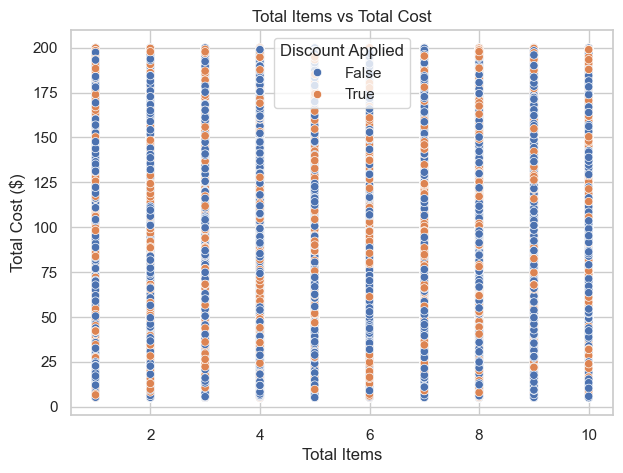

In [136]:
print(df.columns)

if 'Total_Items' in df.columns and 'Total_Cost' in df.columns and 'Discount_Applied' in df.columns:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=df, x='Total_Items', y='Total_Cost', hue='Discount_Applied')
    plt.title('Total Items vs Total Cost')
    plt.xlabel('Total Items')
    plt.ylabel('Total Cost ($)')
    plt.legend(title='Discount Applied')
    plt.show()
else:
    print("One or more columns ('Total_Items', 'Total_Cost', 'Discount_Applied') do not exist in the DataFrame.")

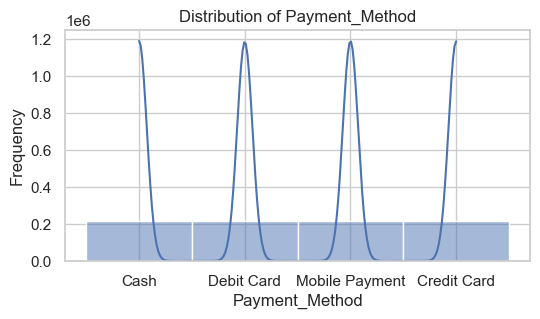

In [137]:
plt.figure(figsize=(6, 3))
sns.histplot(df['Payment_Method'], kde=True, bins=30)
plt.title('Distribution of Payment_Method')
plt.xlabel('Payment_Method')
plt.ylabel('Frequency')
plt.show()

In [138]:
df['Total_Items'] = pd.to_datetime(df['Total_Items'])

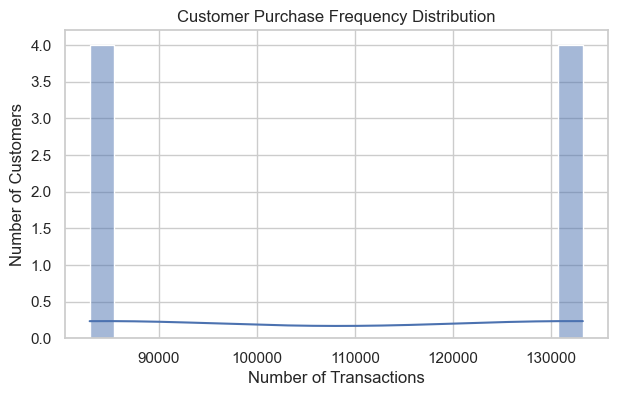

In [139]:
customer_frequency = df.groupby('Customer_Category')['Transaction_ID'].count()

plt.figure(figsize=(7,4))
sns.histplot(customer_frequency, kde=True, bins=20)
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

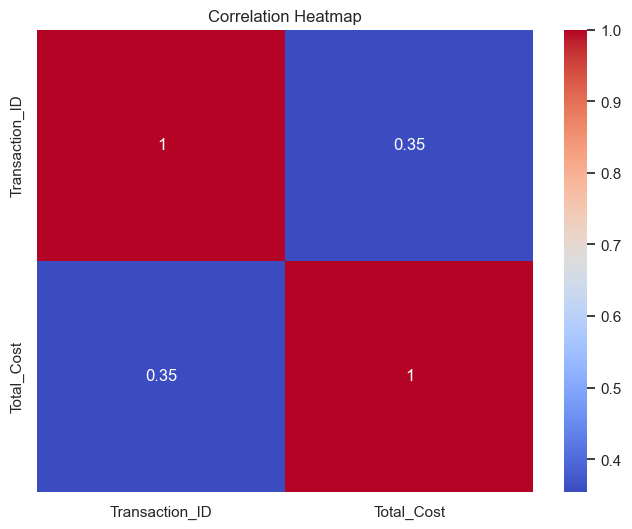

In [140]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

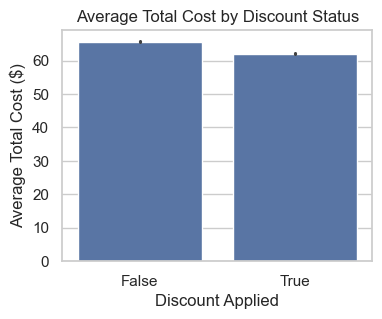

In [141]:
plt.figure(figsize=(4, 3))
sns.barplot(data=df, x='Discount_Applied', y='Total_Cost', estimator='mean')
plt.title('Average Total Cost by Discount Status')
plt.xlabel('Discount Applied')
plt.ylabel('Average Total Cost ($)')
plt.show()

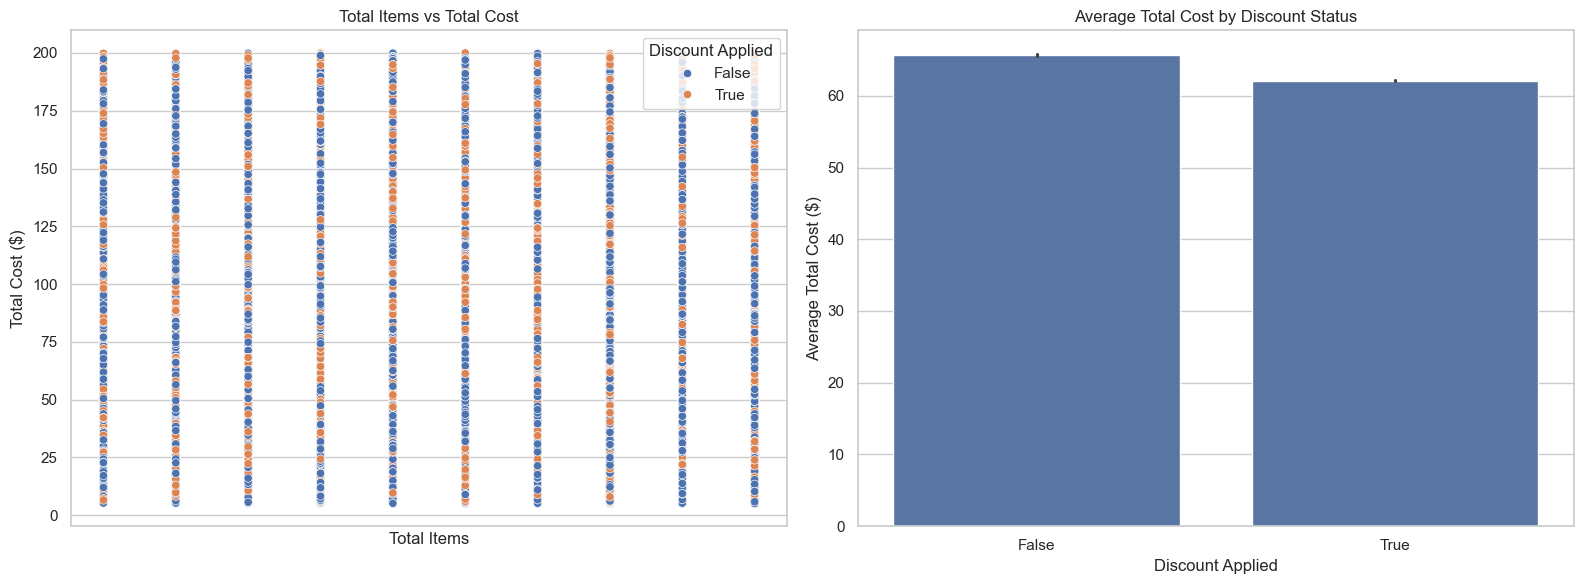

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=df, x='Total_Items', y='Total_Cost', hue='Discount_Applied', ax=axes[0])
axes[0].set_title('Total Items vs Total Cost')
axes[0].set_xlabel('Total Items')
axes[0].set_ylabel('Total Cost ($)')
axes[0].legend(title='Discount Applied')

sns.barplot(data=df, x='Discount_Applied', y='Total_Cost', estimator='mean', ax=axes[1])
axes[1].set_title('Average Total Cost by Discount Status')
axes[1].set_xlabel('Discount Applied')
axes[1].set_ylabel('Average Total Cost ($)')

plt.tight_layout()
plt.show()

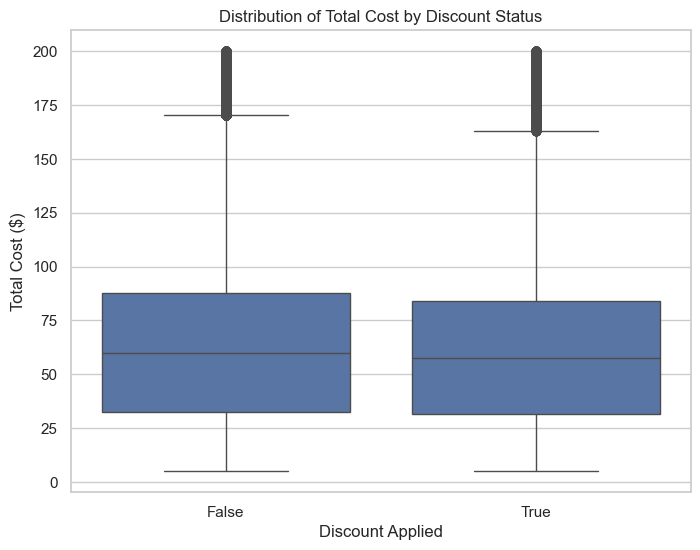

In [143]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Discount_Applied', y='Total_Cost')
plt.title('Distribution of Total Cost by Discount Status')
plt.xlabel('Discount Applied')
plt.ylabel('Total Cost ($)')
plt.show()

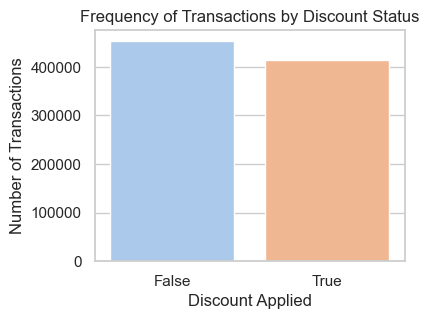

In [144]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Discount_Applied', palette='pastel')
plt.title('Frequency of Transactions by Discount Status')
plt.xlabel('Discount Applied')
plt.ylabel('Number of Transactions')
plt.show()

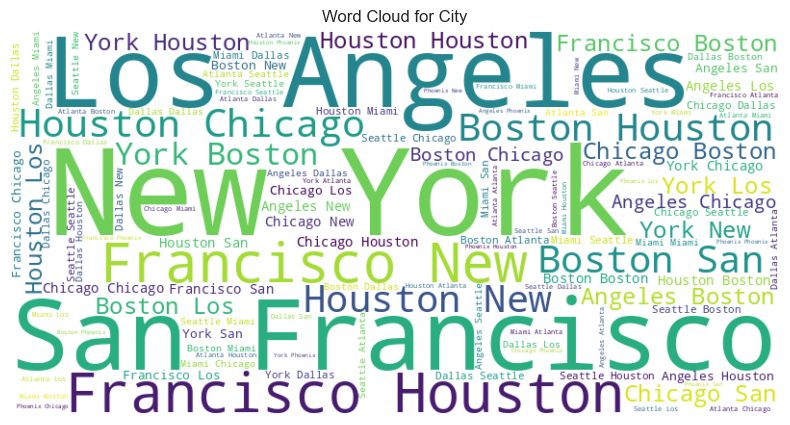

In [145]:
text_data = ' '.join(df['City'].dropna()) 

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for City')
plt.show()

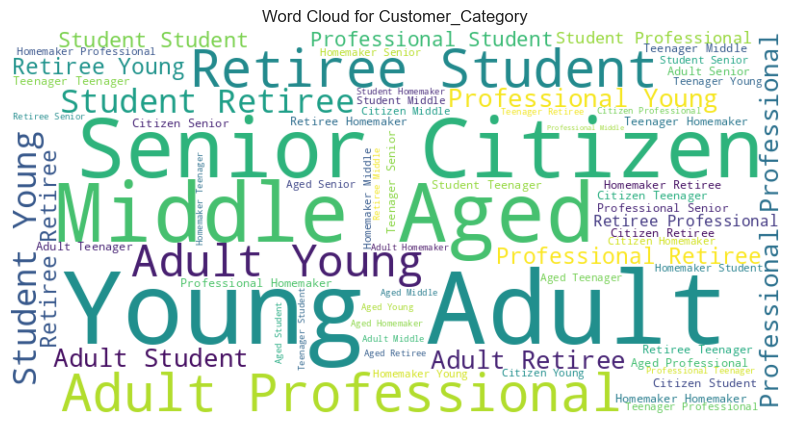

In [146]:
text_data = ' '.join(df['Customer_Category'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Customer_Category')
plt.show()

### Market basket analysis

In [147]:
df['City'].value_counts()

City
Boston           95587
Houston          95567
New York         95364
Chicago          95240
San Francisco    94930
Los Angeles      94889
Seattle          66892
Dallas           66851
Miami            66363
Atlanta          66050
Phoenix          28324
Name: count, dtype: int64

In [148]:
df['Store_Type'].value_counts()

Store_Type
Supermarket          178037
Convenience Store    178012
Specialty Store      176913
Pharmacy             111290
Warehouse Club       111171
Department Store     110634
Name: count, dtype: int64

In [149]:
SELECTED_CITY = 'New York'

df_by_city = df[df['City'] == SELECTED_CITY]

df_by_city['Product'] = df_by_city['Product'].str.replace(r"[\[\]']", '', regex=True).str.split(',')

transaction_data = df_by_city.explode('Product')

transaction_data['Product'] = transaction_data['Product'].str.strip()

In [150]:
df_by_city

Transaction_ID                 Date     Customer_Name  \
11           1000000011  2023-03-30 19:26:41    Jeremiah White   
12           1000000012  2023-05-27 15:52:59      Sheila Mcgee   
18           1000000018  2022-07-18 11:33:28   Dominique Stout   
22           1000000022  2021-06-08 10:28:59      Nicole White   
25           1000000025  2020-02-14 13:19:10  Jessica Gonzalez   
...                 ...                  ...               ...   
1199974      1001199974  2023-07-30 13:55:57       Jamie Jones   
1199978      1001199978  2024-06-17 20:30:35   Taylor Williams   
1199988      1001199988  2020-05-21 11:14:22        Drew Smith   
1199998      1001199998  2022-08-21 16:34:11   Jamie Rodriguez   
1199999      1001199999  2021-04-16 18:29:51   Casey Rodriguez   

                                                   Product  \
11                          [Tea,  Paper Towels,  Spinach]   
12                                [Salmon,  Shaving Cream]   
18                                     [Mustard,  Dustpan]   
22       [Shrimp,  Iron,  Cleaning Spray,  Toilet Paper...   
25                                        [Broom,  Cereal]   
...                                                    ...   
1199974        [Shampoo,  Eggs,  Butter,  Chicken,  Honey]   
1199978                        [Milk,  Soda,  Eggs,  Fish]   
1199988                                     [Honey,  Eggs]   
1199998                                     [Syrup,  Eggs]   
1199999                           [Milk,  Shampoo,  Bread]   

                          Total_Items  Total_Cost  Payment_Method      City  \
11      1970-01-01 00:00:00.000000007       31.88  Mobile Payment  New York   
12      1970-01-01 00:00:00.000000009       39.75      Debit Card  New York   
18      1970-01-01 00:00:00.000000003       98.28  Mobile Payment  New York   
22      1970-01-01 00:00:00.000000004       35.62  Mobile Payment  New York   
25      1970-01-01 00:00:00.000000010        7.82     Credit Card  New York   
...                               ...         ...             ...       ...   
1199974 1970-01-01 00:00:00.000000006      121.67     Credit Card  New York   
1199978 1970-01-01 00:00:00.000000005      154.71     Credit Card  New York   
1199988 1970-01-01 00:00:00.000000007      106.52            Cash  New York   
1199998 1970-01-01 00:00:00.000000002      124.29            Cash  New York   
1199999 1970-01-01 00:00:00.000000007      183.47      Debit Card  New York   

                Store_Type  Discount_Applied Customer_Category  Season  \
11         Specialty Store             False       Young Adult    Fall   
12                Pharmacy             False           Student  Summer   
18          Warehouse Club             False      Professional    Fall   
22          Warehouse Club              True           Retiree  Spring   
25       Convenience Store             False      Professional    Fall   
...                    ...               ...               ...     ...   
1199974    Specialty Store              True           Student  Winter   
1199978        Supermarket              True       Young Adult  Summer   
1199988    Specialty Store             False           Student  Spring   
1199998        Supermarket              True           Retiree    Fall   
1199999    Specialty Store             False           Retiree    Fall   

                          Promotion  
11       Discount on Selected Items  
12       Discount on Selected Items  
18           BOGO (Buy One Get One)  
22           BOGO (Buy One Get One)  
25           BOGO (Buy One Get One)  
...                             ...  
1199974                   Free Gift  
1199978      BOGO (Buy One Get One)  
1199988      BOGO (Buy One Get One)  
1199998      BOGO (Buy One Get One)  
1199999      BOGO (Buy One Get One)  

[95364 rows x 13 columns]

In [151]:
transaction_data

Transaction_ID                 Date    Customer_Name        Product  \
11           1000000011  2023-03-30 19:26:41   Jeremiah White            Tea   
11           1000000011  2023-03-30 19:26:41   Jeremiah White   Paper Towels   
11           1000000011  2023-03-30 19:26:41   Jeremiah White        Spinach   
12           1000000012  2023-05-27 15:52:59     Sheila Mcgee         Salmon   
12           1000000012  2023-05-27 15:52:59     Sheila Mcgee  Shaving Cream   
...                 ...                  ...              ...            ...   
1199998      1001199998  2022-08-21 16:34:11  Jamie Rodriguez          Syrup   
1199998      1001199998  2022-08-21 16:34:11  Jamie Rodriguez           Eggs   
1199999      1001199999  2021-04-16 18:29:51  Casey Rodriguez           Milk   
1199999      1001199999  2021-04-16 18:29:51  Casey Rodriguez        Shampoo   
1199999      1001199999  2021-04-16 18:29:51  Casey Rodriguez          Bread   

                          Total_Items  Total_Cost  Payment_Method      City  \
11      1970-01-01 00:00:00.000000007       31.88  Mobile Payment  New York   
11      1970-01-01 00:00:00.000000007       31.88  Mobile Payment  New York   
11      1970-01-01 00:00:00.000000007       31.88  Mobile Payment  New York   
12      1970-01-01 00:00:00.000000009       39.75      Debit Card  New York   
12      1970-01-01 00:00:00.000000009       39.75      Debit Card  New York   
...                               ...         ...             ...       ...   
1199998 1970-01-01 00:00:00.000000002      124.29            Cash  New York   
1199998 1970-01-01 00:00:00.000000002      124.29            Cash  New York   
1199999 1970-01-01 00:00:00.000000007      183.47      Debit Card  New York   
1199999 1970-01-01 00:00:00.000000007      183.47      Debit Card  New York   
1199999 1970-01-01 00:00:00.000000007      183.47      Debit Card  New York   

              Store_Type  Discount_Applied Customer_Category  Season  \
11       Specialty Store             False       Young Adult    Fall   
11       Specialty Store             False       Young Adult    Fall   
11       Specialty Store             False       Young Adult    Fall   
12              Pharmacy             False           Student  Summer   
12              Pharmacy             False           Student  Summer   
...                  ...               ...               ...     ...   
1199998      Supermarket              True           Retiree    Fall   
1199998      Supermarket              True           Retiree    Fall   
1199999  Specialty Store             False           Retiree    Fall   
1199999  Specialty Store             False           Retiree    Fall   
1199999  Specialty Store             False           Retiree    Fall   

                          Promotion  
11       Discount on Selected Items  
11       Discount on Selected Items  
11       Discount on Selected Items  
12       Discount on Selected Items  
12       Discount on Selected Items  
...                             ...  
1199998      BOGO (Buy One Get One)  
1199998      BOGO (Buy One Get One)  
1199999      BOGO (Buy One Get One)  
1199999      BOGO (Buy One Get One)  
1199999      BOGO (Buy One Get One)  

[286399 rows x 13 columns]

In [152]:
SHOW_TOP = 15
transaction_products = transaction_data['Product'].value_counts()

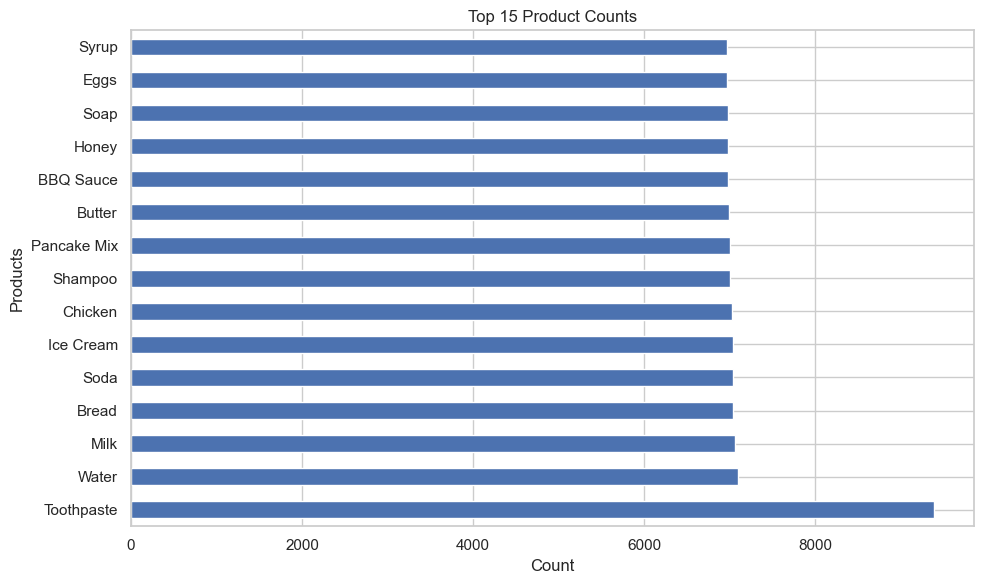

In [153]:
transaction_products = transaction_data['Product'].value_counts().head(SHOW_TOP)


plt.figure(figsize=(10, 6))
transaction_products.plot(kind='barh')
plt.title('Top 15 Product Counts')
plt.xlabel('Count')
plt.ylabel('Products')
plt.tight_layout()
plt.show()

### Other retail transactions analysis

In [154]:
months=list(calendar.month_name)[1:]
data = df
c1=cm.get_cmap('Set1')

In [155]:
sample1=[]
for i in data.Product:
  sample=i[1:-1].split(',')
  for j in sample:
    sample1.append(j.strip())
products=set(sample1)

Text(0.5, 1.0, 'Customer Category')

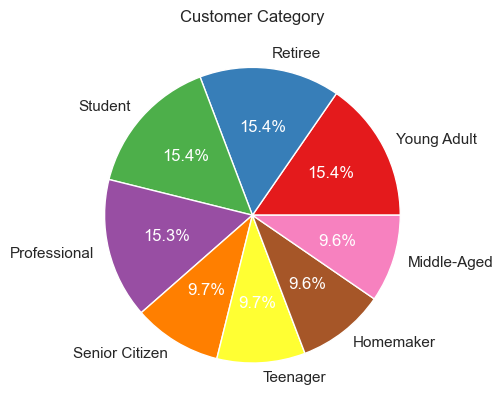

In [156]:
val=data["Customer_Category"].value_counts()
wedges,texts,autotexts=plt.pie(val,labels=val.index,autopct="%1.1f%%")
colors=[c1(i) for i in np.arange(0.1,0.9,0.1)]
for i in range(len(wedges)):
    wedges[i].set_facecolor(colors[i])
    autotexts[i].set_color('white')
plt.title('Customer Category')

In [157]:
newdfs=data[['Product','Season']].groupby('Season')

In [158]:
seasons=data.Season.unique()

In [159]:
def converter(input_element):
    return input_element.replace('[','').replace(']','').replace("'","")

In [160]:
dfs=[]
for i in seasons:
    dfs.append((i,newdfs.get_group(i)['Product'].apply(converter)))

In [161]:
def productcount(season,df):
    
    k={}
    for i in df:
        for j in i.split(','):
            j=j.strip()
            if j not in k:
                k[j]=1
            else:
                k[j]+=1
    return season,k 

answer=[]
for i in range(len(dfs)):
    answer.append(productcount(dfs[i][0],dfs[i][1]))

In [162]:
dataframe=[]

for i in range(len(answer)):
    df=pd.DataFrame(dict(products=answer[i][1].keys(),count=answer[i][1].values()))
    df.index.name=answer[i][0]
    dataframe.append(df)

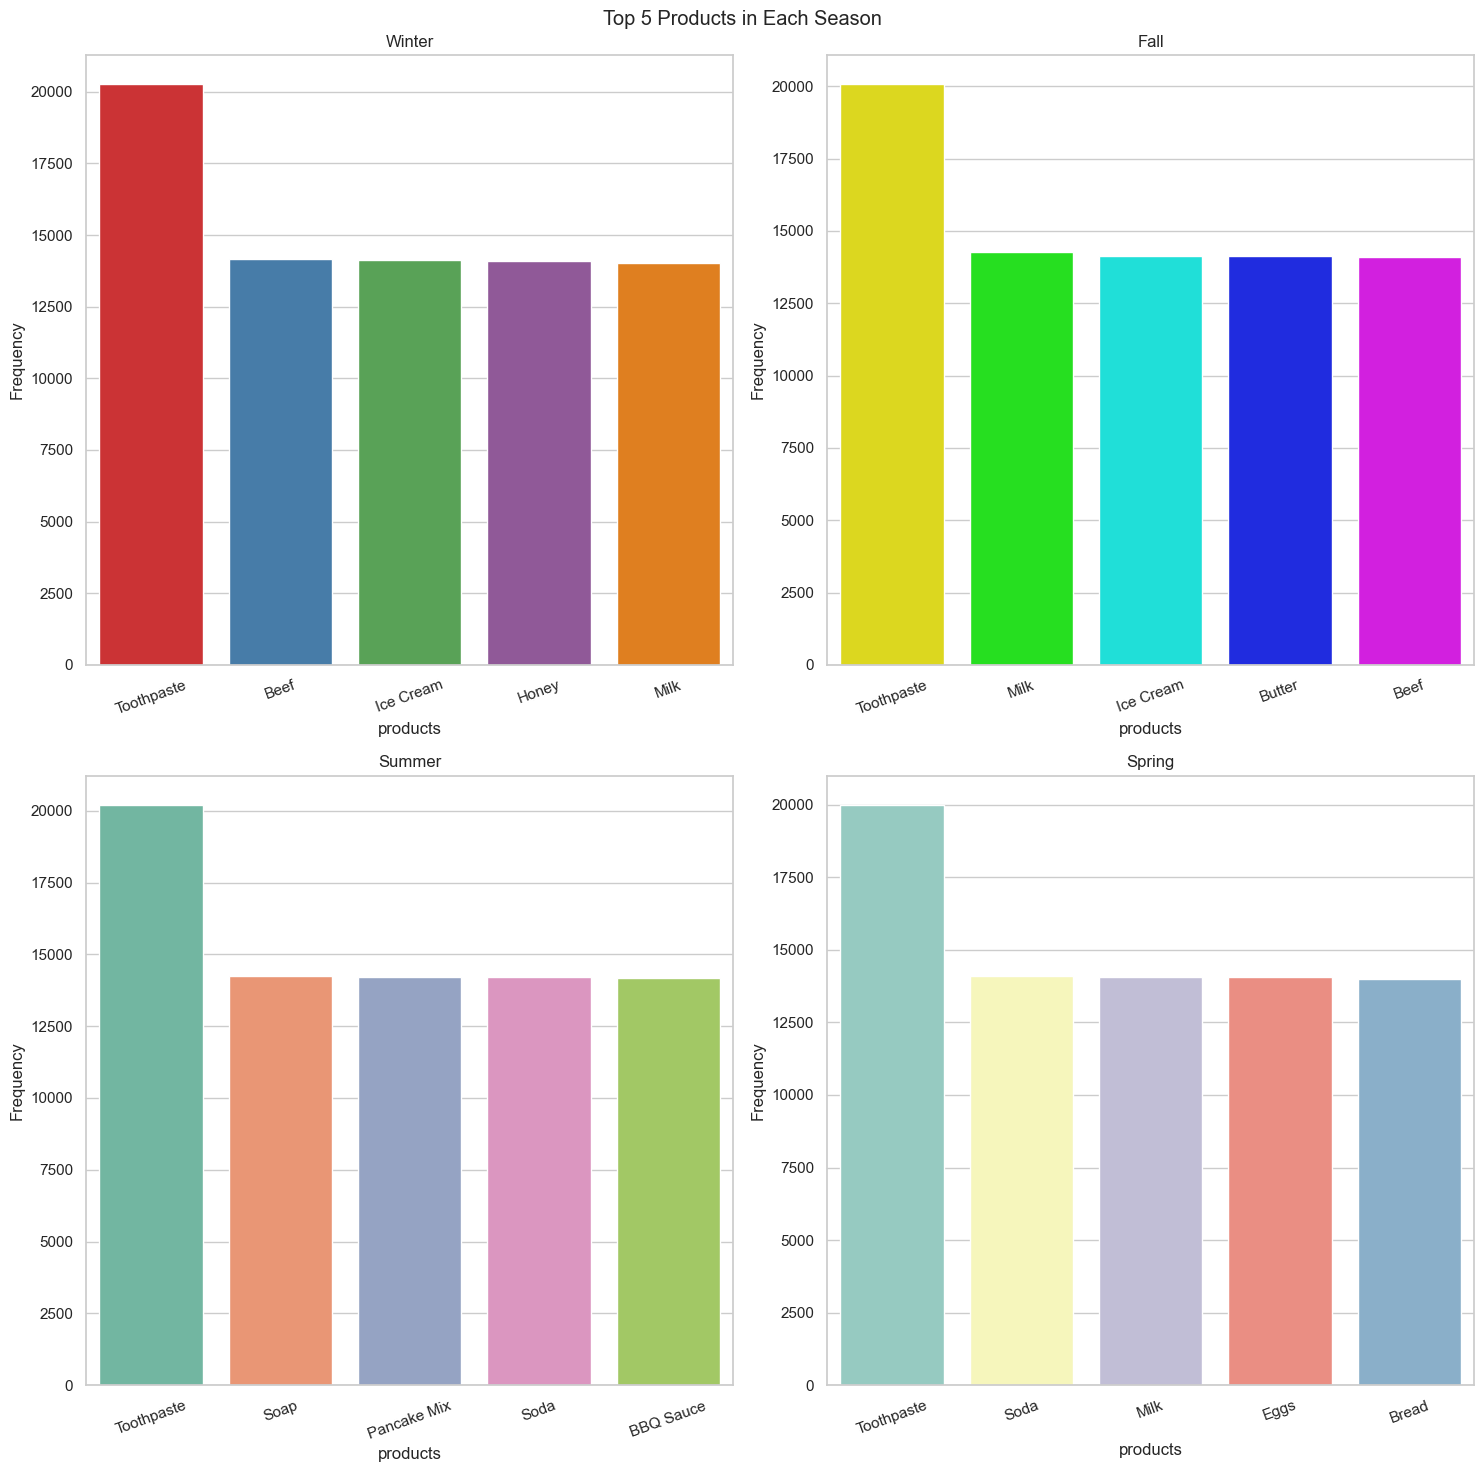

In [163]:
winter=dataframe[0].sort_values(by='count',ascending=False).head(5)
Fall=dataframe[1].sort_values(by='count',ascending=False).head(5)
summer=dataframe[2].sort_values(by='count',ascending=False).head(5)
spring=dataframe[3].sort_values(by='count',ascending=False).head(5)

fig, axes=plt.subplots(2,2,figsize=(15,15))

sns.barplot(x=winter.products,y=winter['count'],ax=axes[0][0],palette='Set1')
sns.barplot(x=Fall.products,y=Fall['count'],ax=axes[0][1],palette='hsv')
sns.barplot(x=summer.products,y=summer['count'],ax=axes[1][0],palette='Set2')
sns.barplot(x=spring.products,y=spring['count'],ax=axes[1][1],palette='Set3')

title=["Winter", "Fall", "Summer", "Spring"]
count=0

for i in range(2):
  for j in range(2):
    axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(),rotation=20)
    axes[i][j].set_title(title[count])
    axes[i][j].set_ylabel('Frequency')
    count+=1
    
plt.suptitle('Top 5 Products in Each Season')
plt.tight_layout()

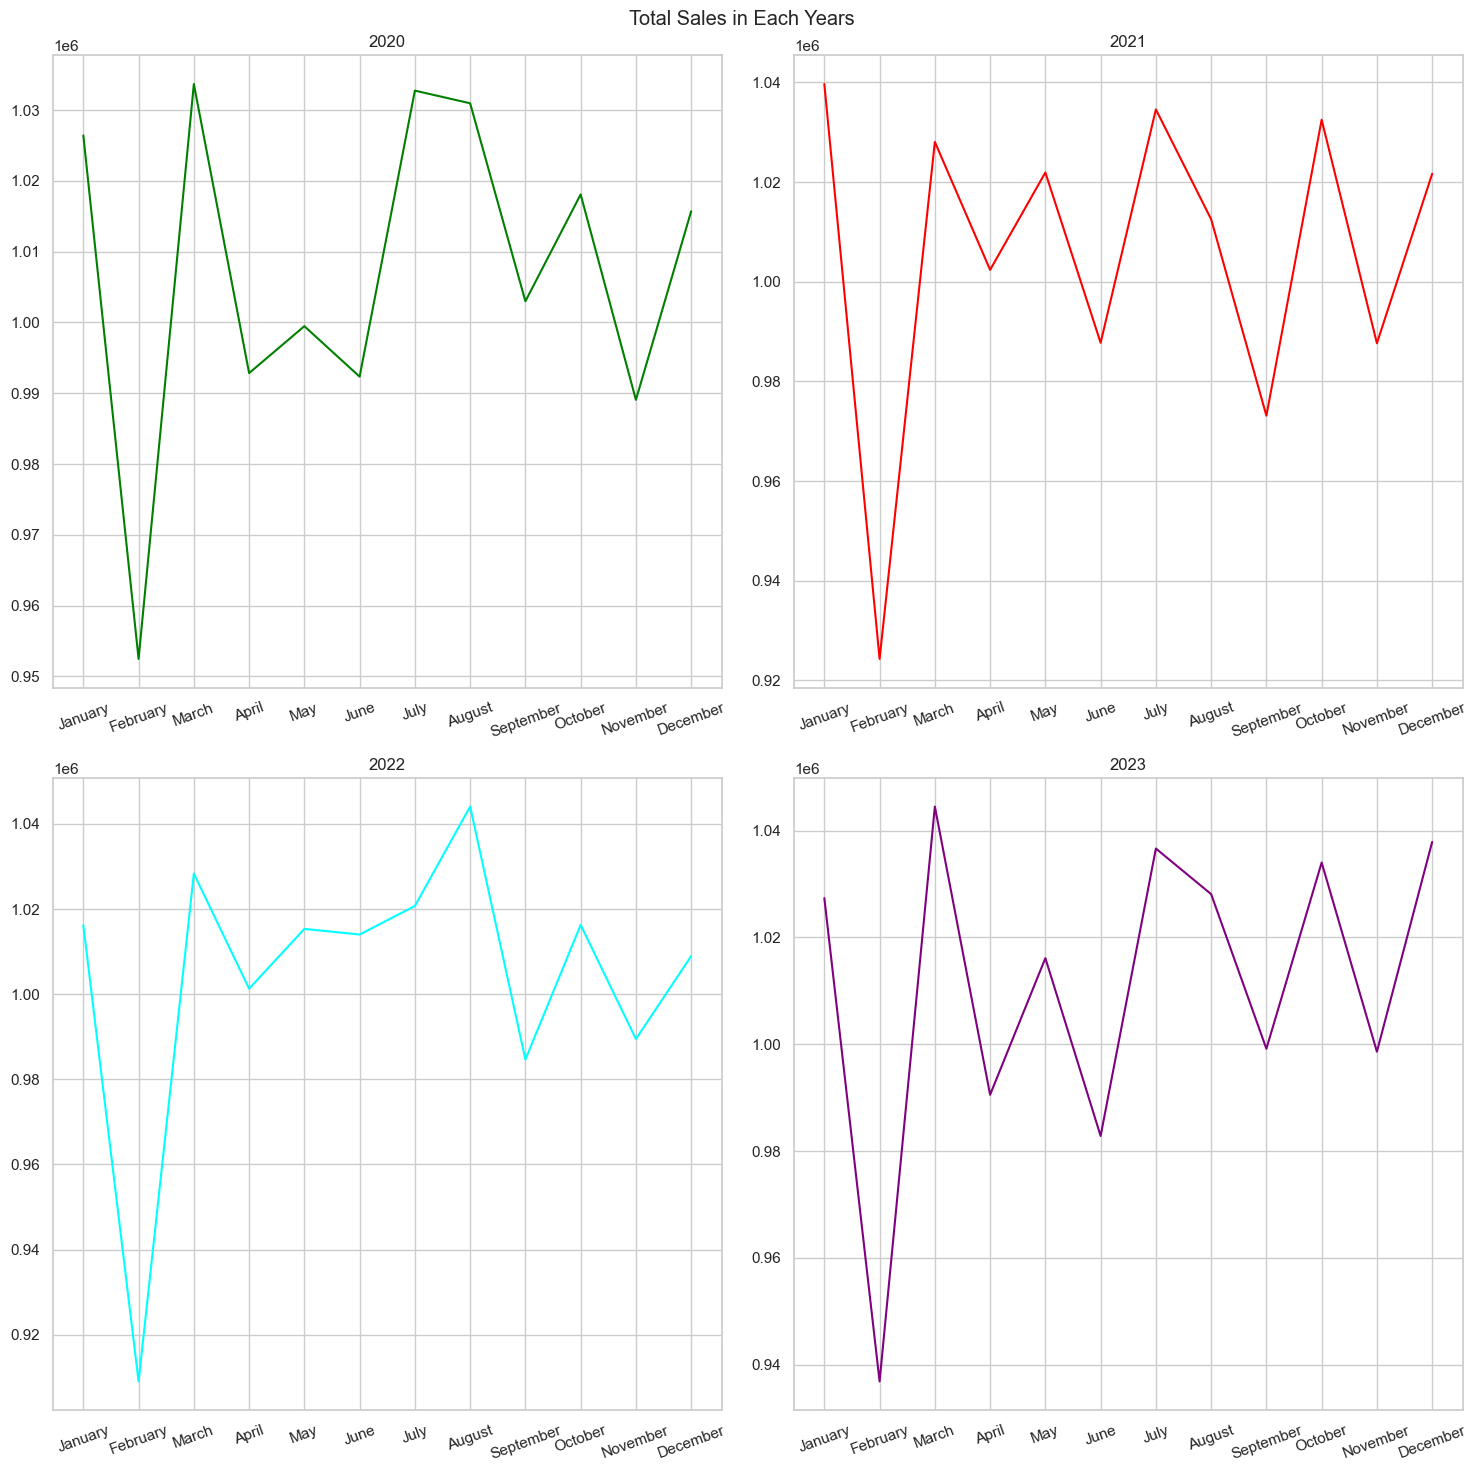

In [164]:
data.Date=pd.to_datetime(data.Date)
year=[]
month=[]

for i in data.Date:
  year.append(i.strftime("%Y"))
  month.append(i.strftime("%m"))
  
data.drop("Date",axis=1,inplace=True)

data["year"]=year
data['month']=month
data['year']=data['year'].astype('int')
data.month=data['month'].astype('int')

year1=list(data.groupby("year"))[0][1]
year2=list(data.groupby("year"))[1][1]
year3=list(data.groupby("year"))[2][1]
year4=list(data.groupby("year"))[3][1]

year1cost=[]
year2cost=[]
year3cost=[]
year4cost=[]

for i in range(1,13):
  st='month == {}'.format(i)
  year1cost.append(year1.query(st).Total_Cost.sum())
  year2cost.append(year2.query(st).Total_Cost.sum())
  year3cost.append(year3.query(st).Total_Cost.sum())
  year4cost.append(year4.query(st).Total_Cost.sum())
  
fig,axes=plt.subplots(2,2,figsize=(15,15))

sns.lineplot(x=months,y=year1cost,ax=axes[0][0],color='green')
sns.lineplot(x=months,y=year2cost,ax=axes[0][1],color='red')
sns.lineplot(x=months,y=year3cost,ax=axes[1][0],color='cyan')
sns.lineplot(x=months,y=year4cost,ax=axes[1][1],color='purple')
title=["2020","2021","2022","2023"]
count=0
for i in range(2):
  for j in range(2):
    axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(),rotation=20)
    axes[i][j].set_title(title[count])
    count+=1
plt.suptitle('Total Sales in Each Years')
plt.tight_layout()

Text(0.5, 1.0, 'Total Products Frequency')

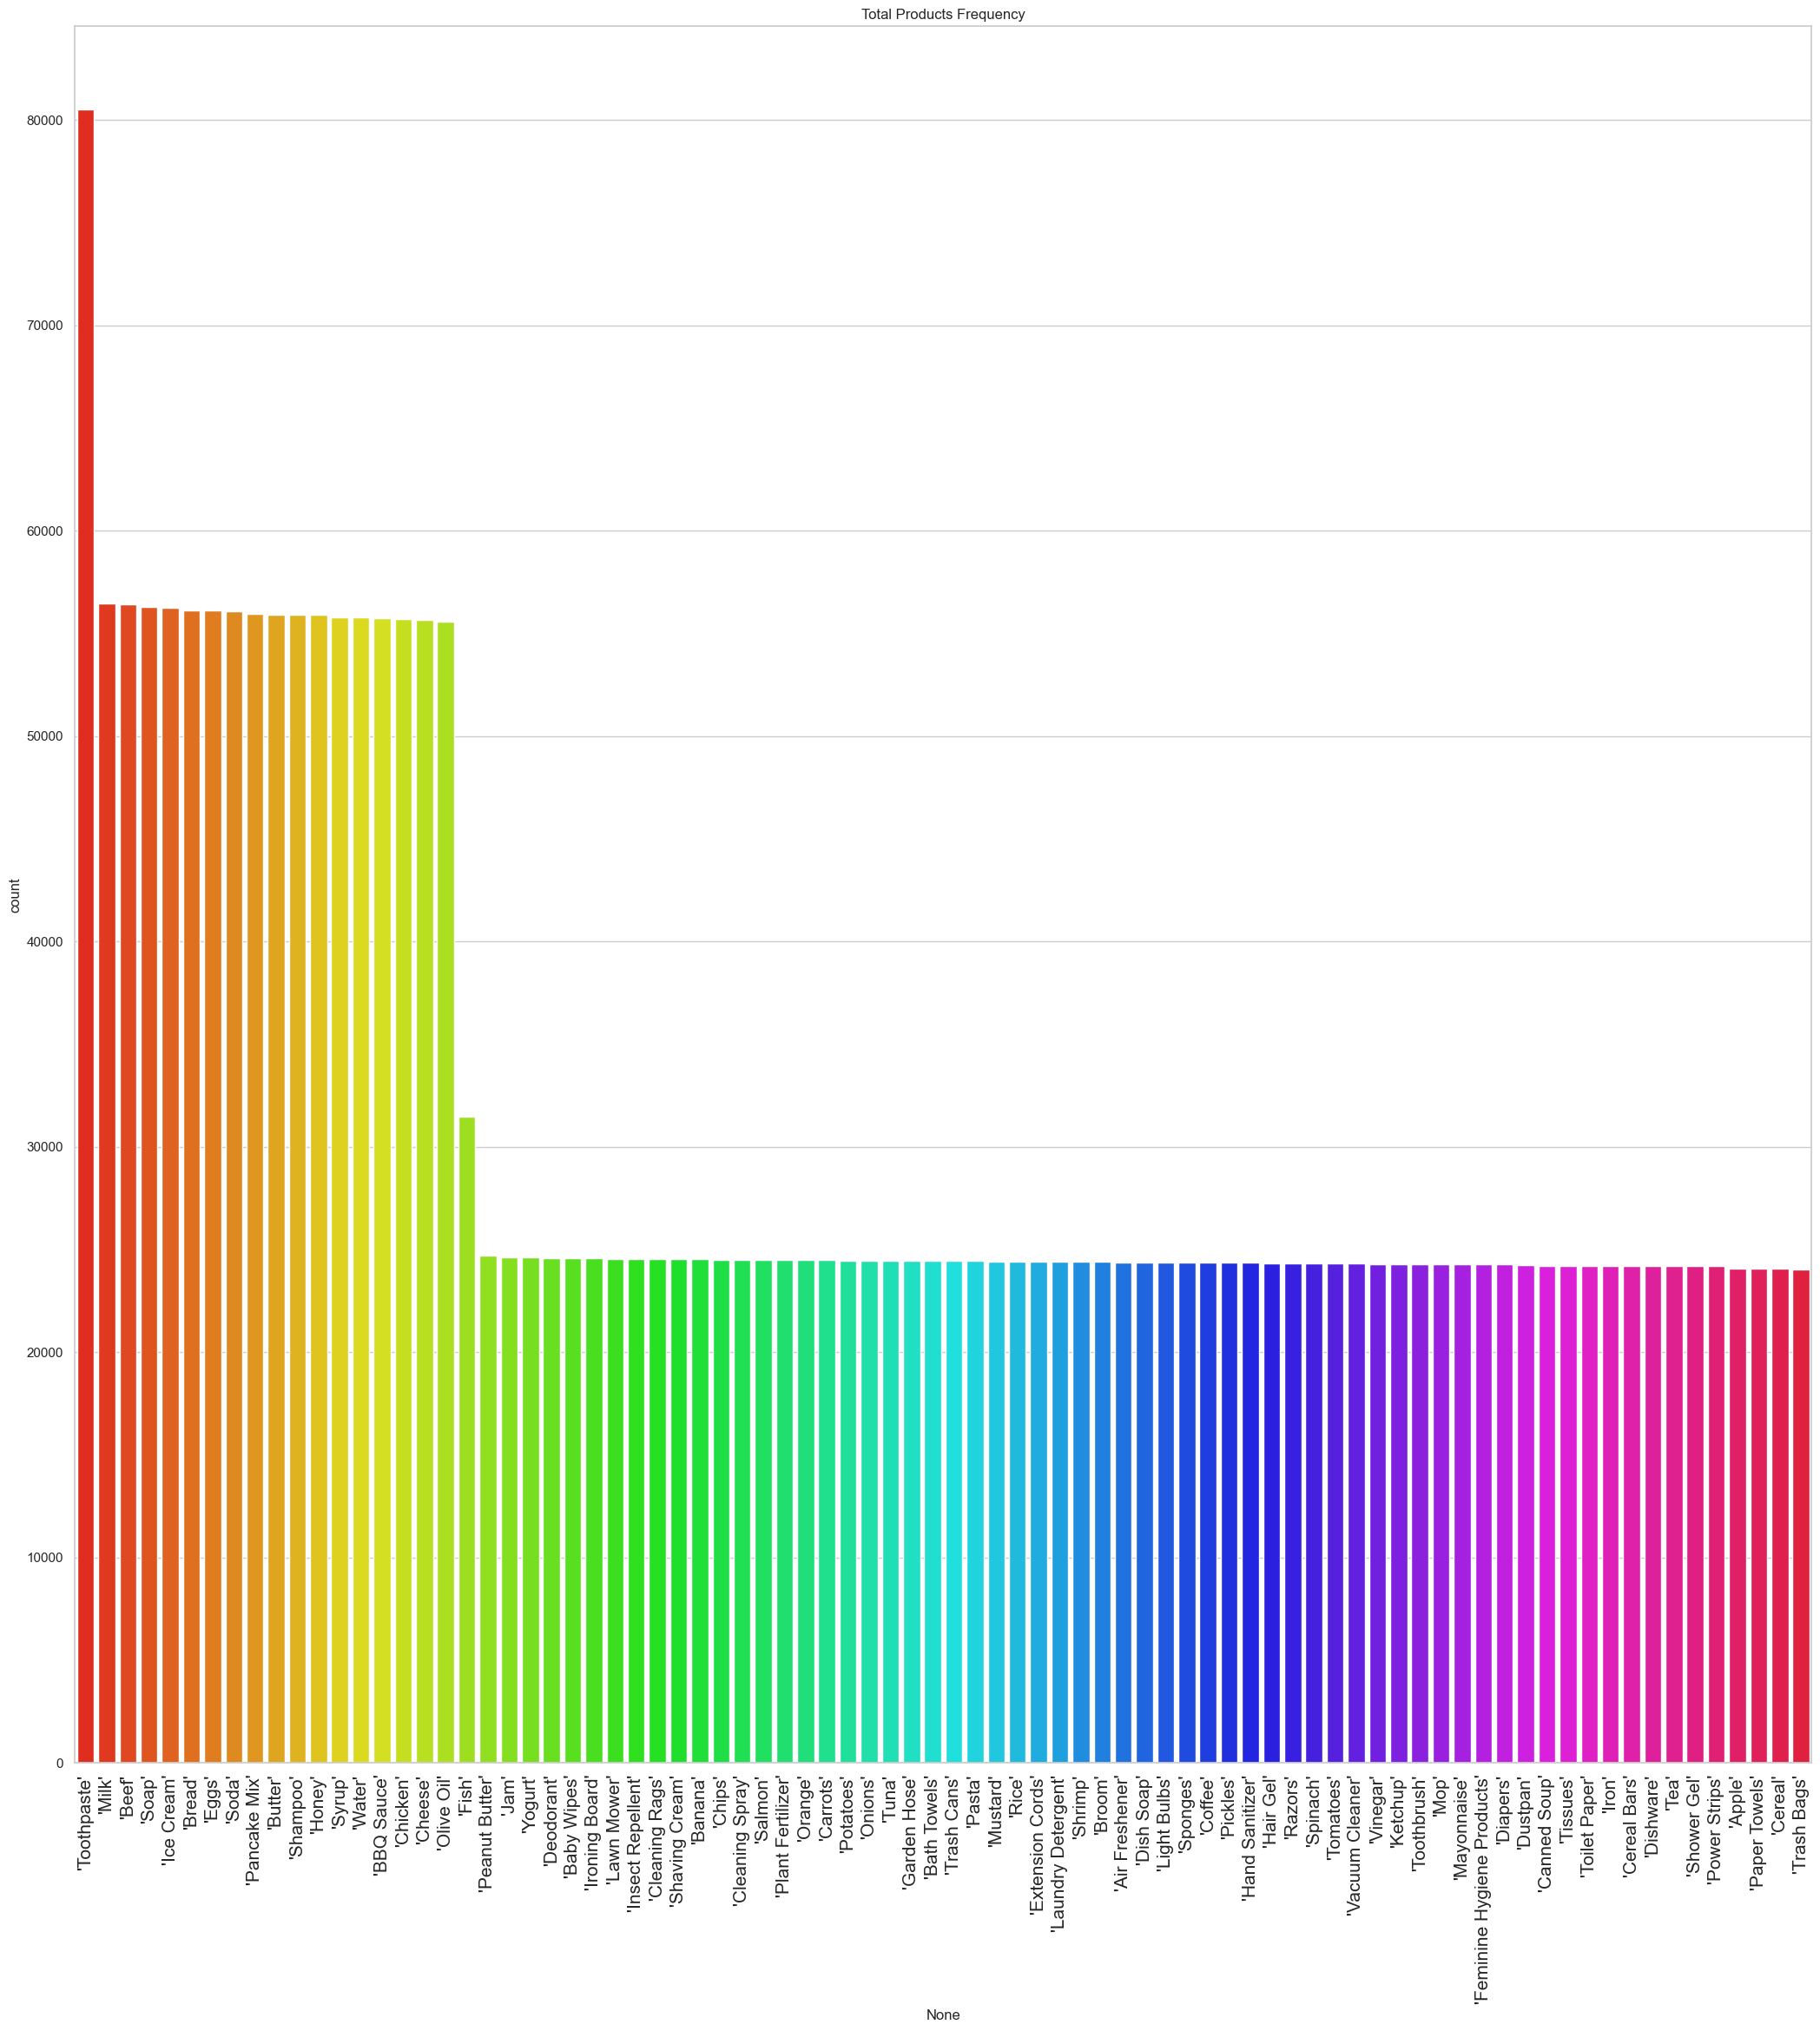

In [ ]:
yval=pd.Series(sample1).value_counts()
xval=yval.index
fig=plt.figure(figsize=(20,20))
ax=fig.add_axes([1,1,1,1])
sns.barplot(x=xval,y=yval,ax=ax,palette='hsv')
plt.xticks(rotation=90,fontsize=15)
plt.title('Total Products Frequency')

In [166]:
df = pd.read_csv(DATASET_PATH)

df.head(5)

Transaction_ID                 Date      Customer_Name  \
0      1000000000  2022-01-21 06:27:29       Stacey Price   
1      1000000001  2023-03-01 13:01:21   Michelle Carlson   
2      1000000002  2024-03-21 15:37:04        Lisa Graves   
3      1000000003  2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004  2020-12-10 00:59:59     Susan Mitchell   

                                             Product  Total_Items  Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
2                                        ['Spinach']            6       41.49   
3                             ['Tissues', 'Mustard']            1       39.34   
4                                      ['Dish Soap']           10       16.42   

   Payment_Method           City        Store_Type  Discount_Applied  \
0  Mobile Payment    Los Angeles    Warehouse Club              True   
1            Cash  San Francisco   Specialty Store              True   
2     Credit Card        Houston  Department Store              True   
3  Mobile Payment        Chicago          Pharmacy              True   
4      Debit Card        Houston   Specialty Store             False   

  Customer_Category  Season                   Promotion  
0         Homemaker  Winter                         NaN  
1      Professional    Fall      BOGO (Buy One Get One)  
2      Professional  Winter                         NaN  
3         Homemaker  Spring                         NaN  
4       Young Adult  Winter  Discount on Selected Items

In [167]:
df.dropna(inplace=True)

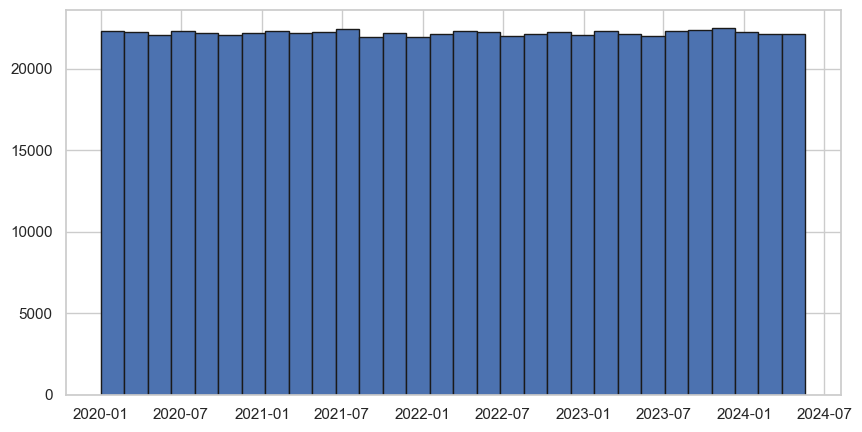

In [168]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10,5))
plt.hist(df['Date'],bins=30,edgecolor='k')
plt.show()

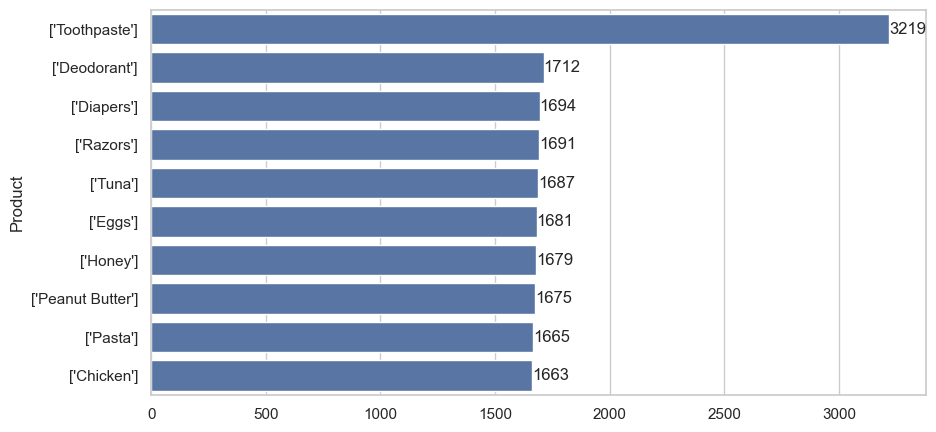

In [169]:
plt.figure(figsize=(10,5))
top_10_products = df['Product'].value_counts().nlargest(10)
ax = sns.barplot(y=top_10_products.index,x=top_10_products.values)
for bars in ax.containers:
    ax.bar_label(bars)

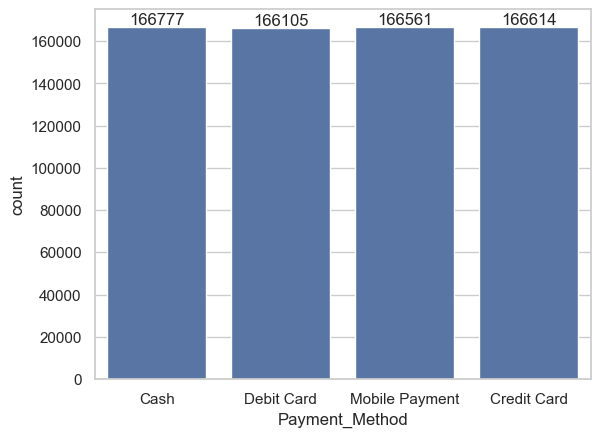

In [170]:
ax = sns.countplot(data=df,x='Payment_Method')
for bars in ax.containers:
    ax.bar_label(bars)

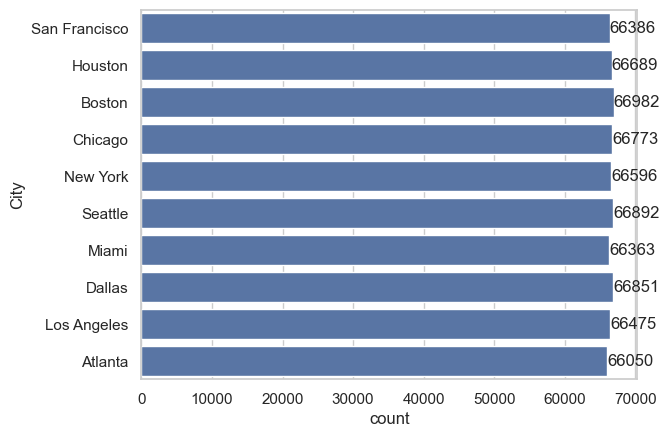

In [171]:
ax = sns.countplot(data=df,y='City')
for bars in ax.containers:
    ax.bar_label(bars)

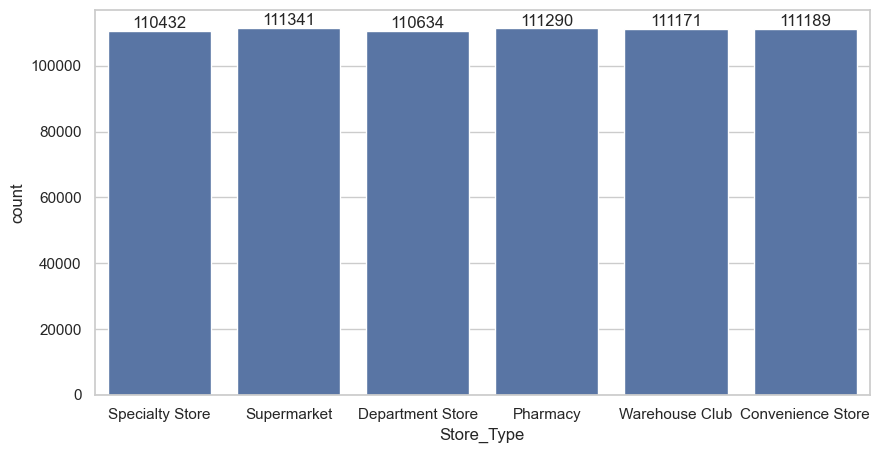

In [172]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df,x='Store_Type')
for bars in ax.containers:
    ax.bar_label(bars)


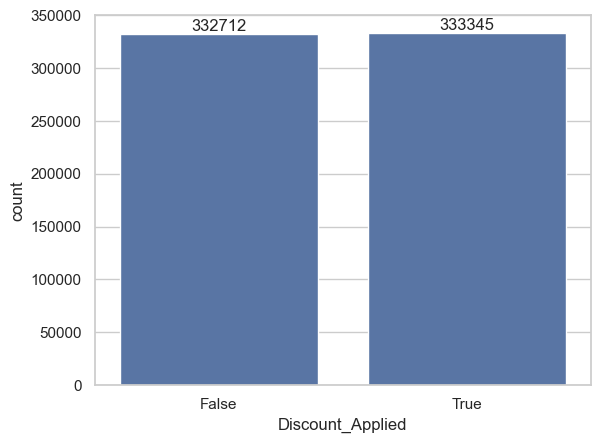

In [173]:
ax = sns.countplot(data=df,x='Discount_Applied')
for bars in ax.containers:
    ax.bar_label(bars)

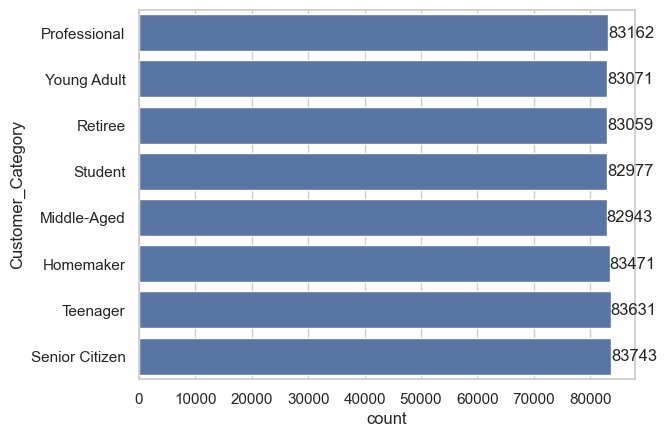

In [174]:
ax = sns.countplot(data=df,y='Customer_Category')
for bars in ax.containers:
    ax.bar_label(bars)

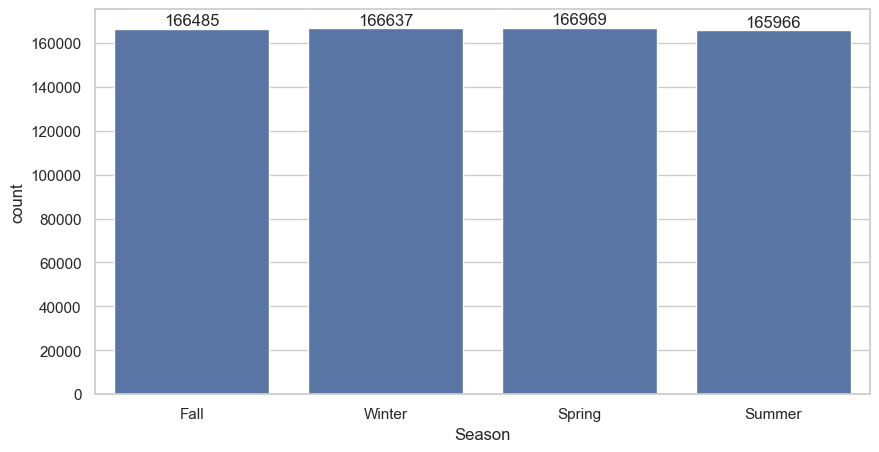

In [175]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df,x='Season')
for bars in ax.containers:
    ax.bar_label(bars)

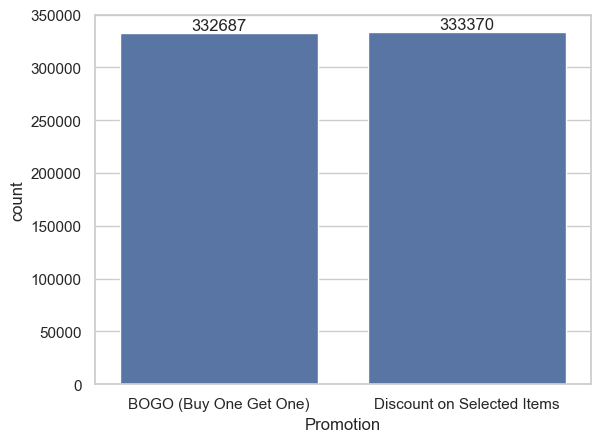

In [176]:
ax = sns.countplot(data=df,x='Promotion')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Total_Items', ylabel='Product'>

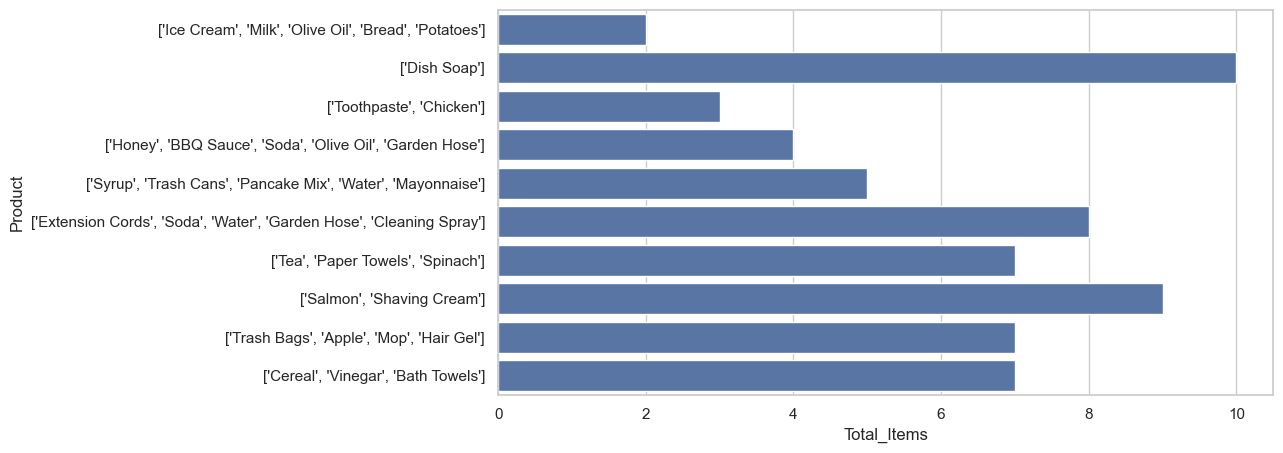

In [177]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, y=df['Product'].head(10),x=df['Total_Items'])

<Axes: xlabel='Total_Cost', ylabel='Product'>

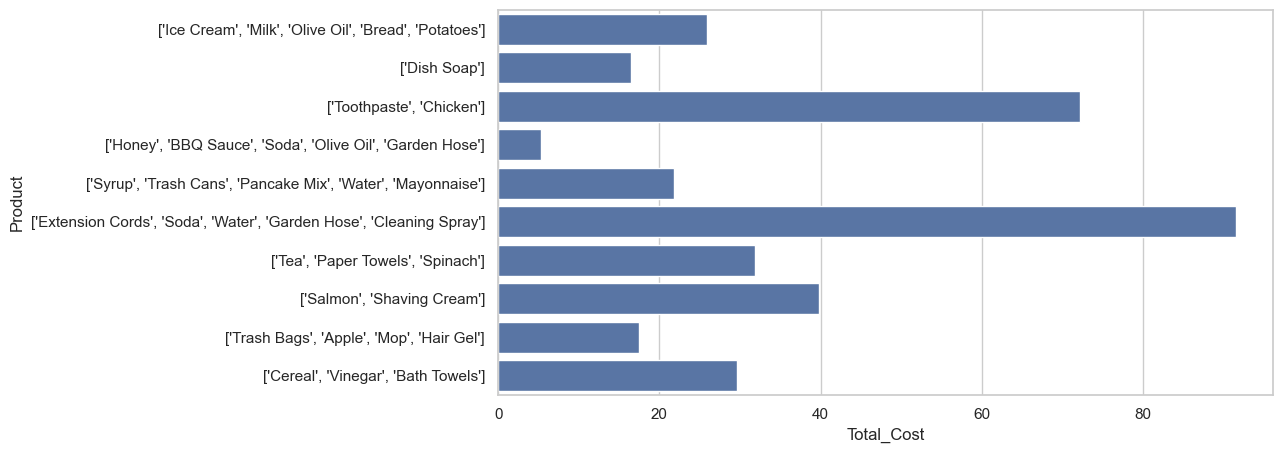

In [178]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, y=df['Product'].head(10),x=df['Total_Cost'])

<Axes: xlabel='Total_Items', ylabel='Payment_Method'>

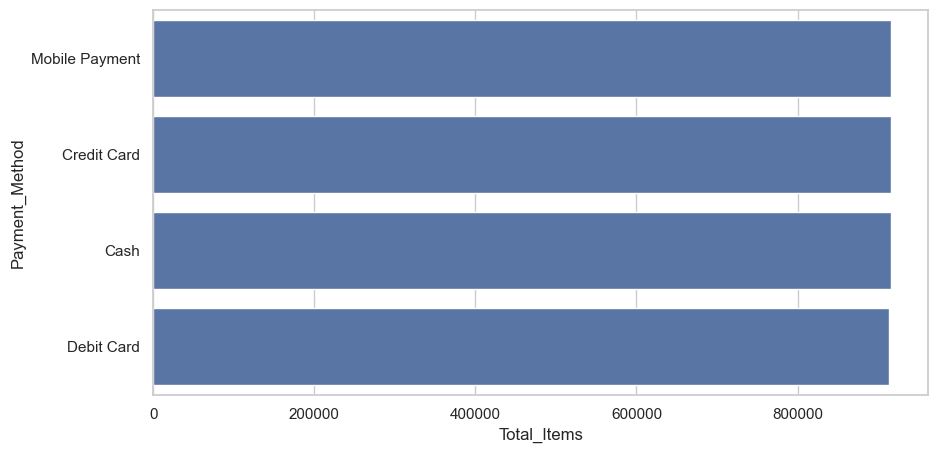

In [179]:
plt.figure(figsize=(10,5))
chart = df.groupby(['Payment_Method'],as_index=False)['Total_Items'].sum().sort_values(by='Total_Items',ascending=False)
sns.barplot(data=chart, y='Payment_Method',x='Total_Items')

<Axes: xlabel='Payment_Method', ylabel='Total_Cost'>

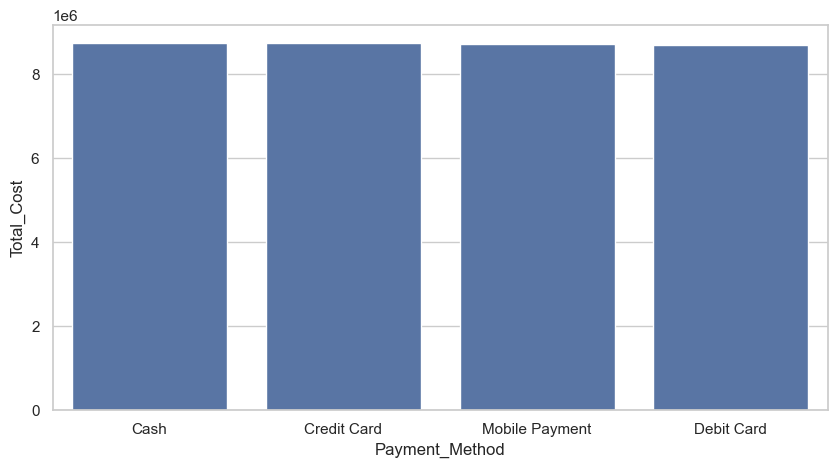

In [180]:
plt.figure(figsize=(10,5))
chart = df.groupby(['Payment_Method'],as_index=False)['Total_Cost'].sum().sort_values(by='Total_Cost',ascending=False)
sns.barplot(data=chart, x='Payment_Method',y='Total_Cost')

<Axes: xlabel='Total_Items', ylabel='City'>

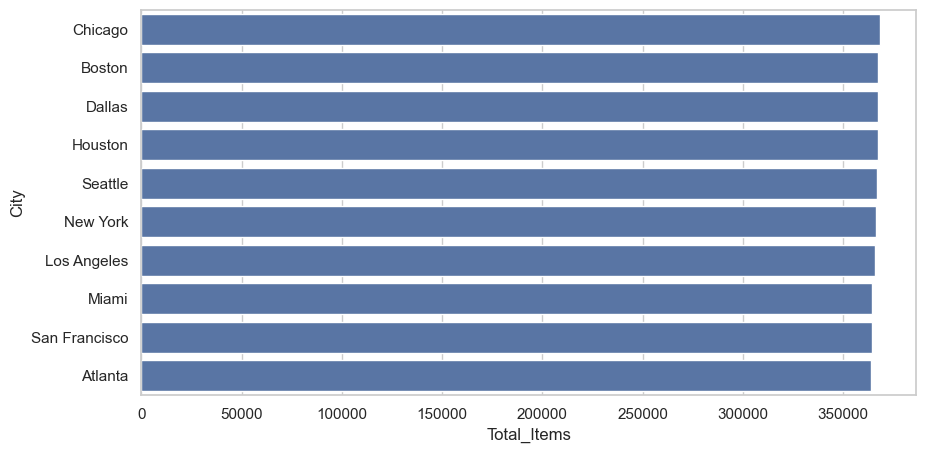

In [181]:
plt.figure(figsize=(10,5))
chart = df.groupby(['City'],as_index=False)['Total_Items'].sum().sort_values(by='Total_Items',ascending=False)
sns.barplot(data=chart, y='City',x='Total_Items')

<Axes: xlabel='Total_Cost', ylabel='City'>

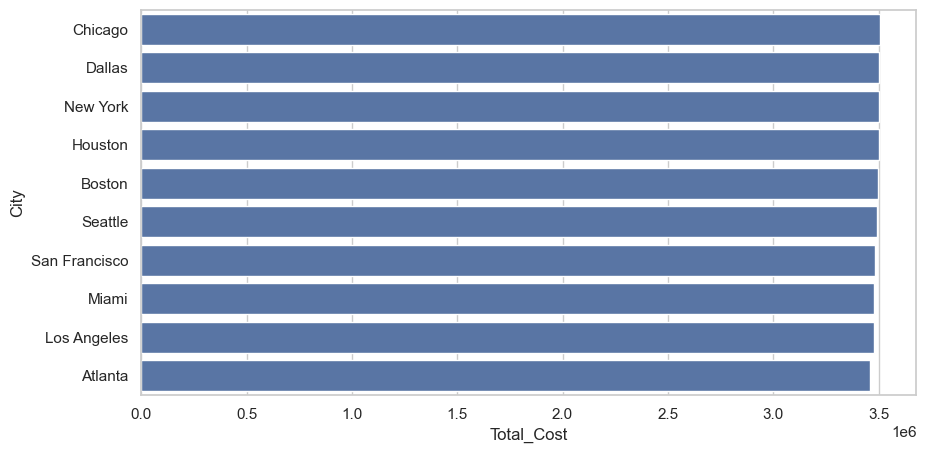

In [182]:
plt.figure(figsize=(10,5))
chart = df.groupby(['City'],as_index=False)['Total_Cost'].sum().sort_values(by='Total_Cost',ascending=False)
sns.barplot(data=chart, y='City',x='Total_Cost')

<Axes: xlabel='Total_Items', ylabel='Store_Type'>

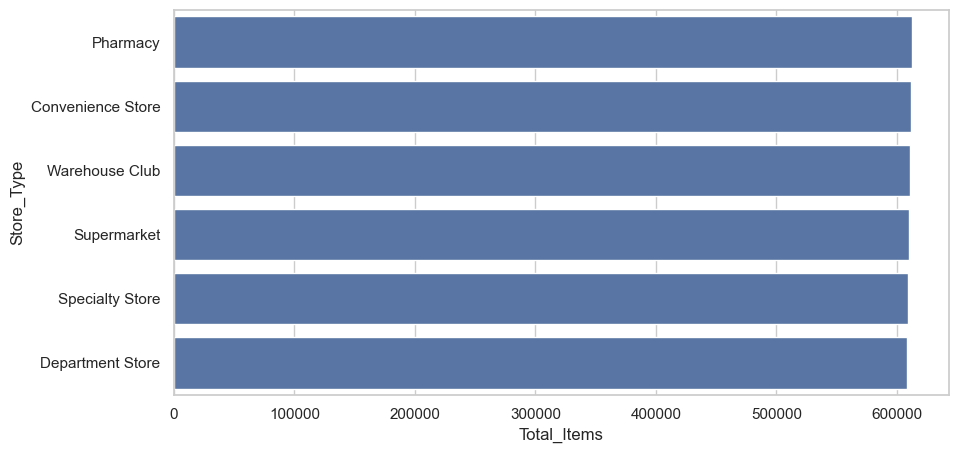

In [183]:
plt.figure(figsize=(10,5))
chart = df.groupby(['Store_Type'],as_index=False)['Total_Items'].sum().sort_values(by='Total_Items',ascending=False)
sns.barplot(data=chart, y='Store_Type',x='Total_Items')

<Axes: xlabel='Total_Cost', ylabel='Store_Type'>

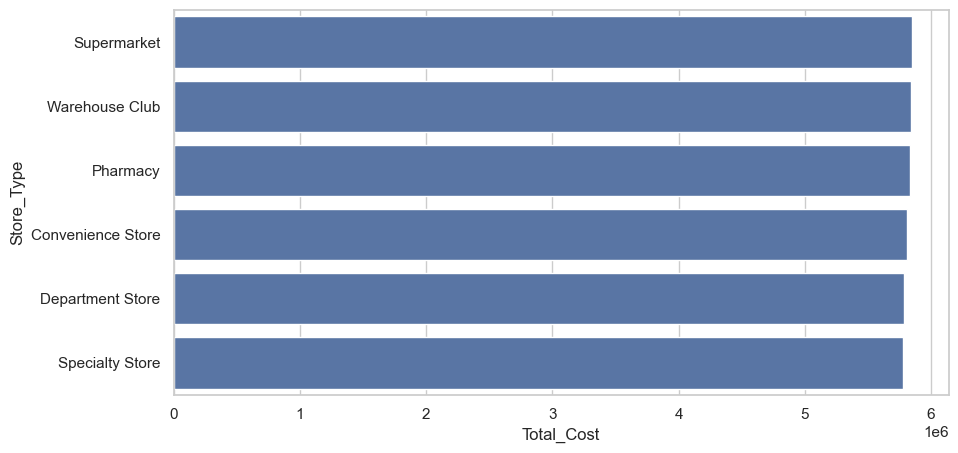

In [184]:
plt.figure(figsize=(10,5))
chart = df.groupby(['Store_Type'],as_index=False)['Total_Cost'].sum().sort_values(by='Total_Cost',ascending=False)
sns.barplot(data=chart, y='Store_Type',x='Total_Cost')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666057 entries, 1 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Transaction_ID     666057 non-null  int64         
 1   Date               666057 non-null  datetime64[ns]
 2   Customer_Name      666057 non-null  object        
 3   Product            666057 non-null  object        
 4   Total_Items        666057 non-null  int64         
 5   Total_Cost         666057 non-null  float64       
 6   Payment_Method     666057 non-null  object        
 7   City               666057 non-null  object        
 8   Store_Type         666057 non-null  object        
 9   Discount_Applied   666057 non-null  bool          
 10  Customer_Category  666057 non-null  object        
 11  Season             666057 non-null  object        
 12  Promotion          666057 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(

In [186]:
print(df.head(5))

   Transaction_ID                Date     Customer_Name  \
1      1000000001 2023-03-01 13:01:21  Michelle Carlson   
4      1000000004 2020-12-10 00:59:59    Susan Mitchell   
5      1000000005 2021-10-07 12:37:26    Joshua Frazier   
6      1000000006 2023-01-08 10:40:03  Victoria Garrett   
7      1000000007 2020-09-03 12:39:59     Sydney Waller   

                                             Product  Total_Items  Total_Cost  \
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
4                                      ['Dish Soap']           10       16.42   
5                          ['Toothpaste', 'Chicken']            3       72.24   
6  ['Honey', 'BBQ Sauce', 'Soda', 'Olive Oil', 'G...            4        5.28   
7  ['Syrup', 'Trash Cans', 'Pancake Mix', 'Water'...            5       21.77   

  Payment_Method           City       Store_Type  Discount_Applied  \
1           Cash  San Francisco  Specialty Store              True   
4     Debit Card  

In [187]:
df.describe()

Transaction_ID                           Date    Total_Items  \
count    6.660570e+05                         666057  666057.000000   
mean     1.000500e+09  2022-03-10 21:50:50.104918784       5.497803   
min      1.000000e+09            2020-01-01 00:07:48       1.000000   
25%      1.000250e+09            2021-02-03 10:26:03       3.000000   
50%      1.000500e+09            2022-03-11 05:41:05       5.000000   
75%      1.000751e+09            2023-04-15 12:39:21       8.000000   
max      1.001000e+09            2024-05-18 19:29:37      10.000000   
std      2.888990e+05                            NaN       2.871845   

          Total_Cost  
count  666057.000000  
mean       52.399692  
min         5.000000  
25%        28.630000  
50%        52.310000  
75%        76.150000  
max       100.000000  
std        27.434712

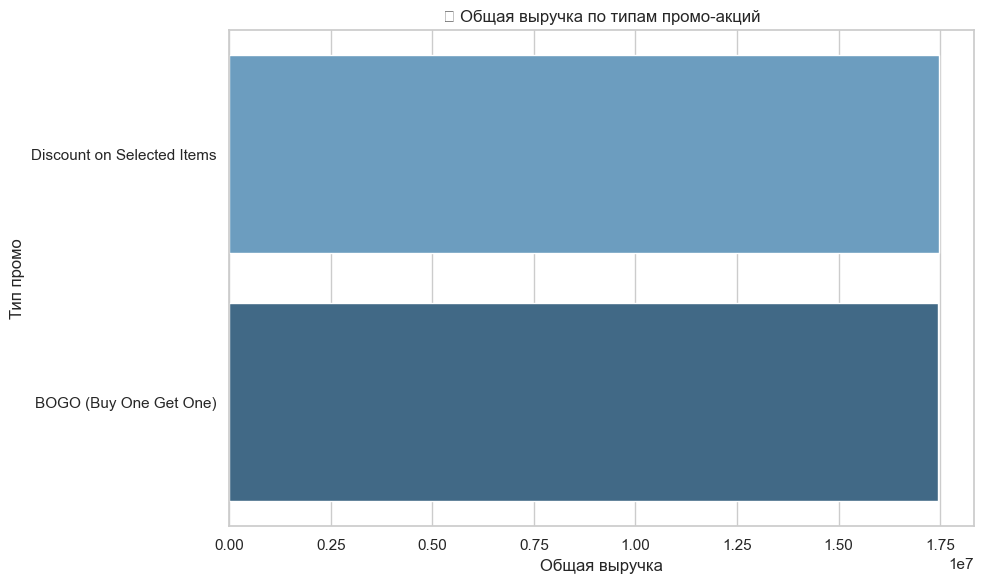

In [ ]:
promo_summary = df.groupby("Promotion").agg(
    total_sales=("Total_Cost", "sum"),
    average_transaction=("Total_Cost", "mean"),
    transaction_count=("Transaction_ID", "count")
).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=promo_summary.sort_values("total_sales", ascending=False),
            x="total_sales", y="Promotion", palette="Blues_d")
plt.title("💰 Общая выручка по типам промо-акций")
plt.xlabel("Общая выручка")
plt.ylabel("Тип промо")
plt.tight_layout()
plt.show()

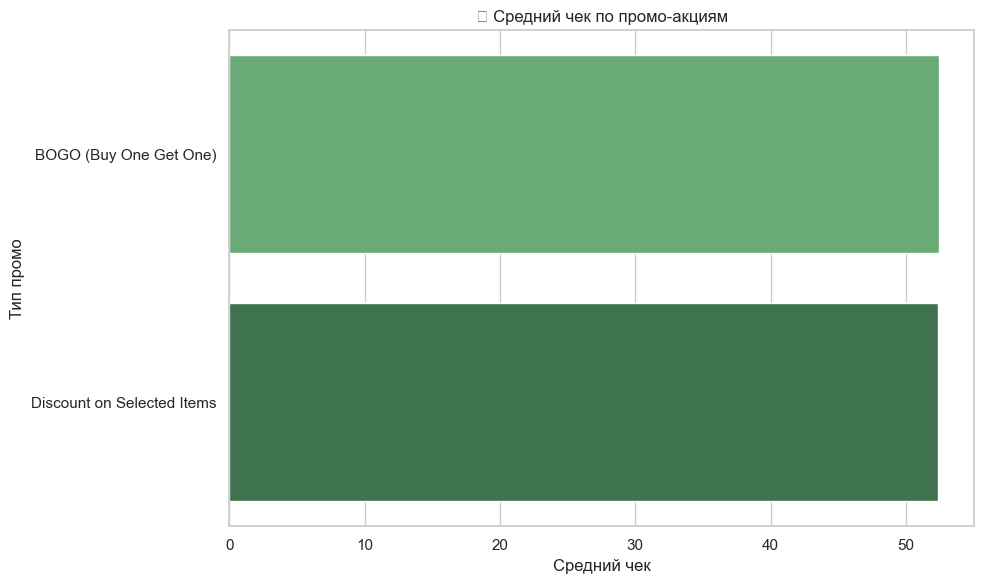

In [189]:
plt.figure(figsize=(10, 6))
sns.barplot(data=promo_summary.sort_values("average_transaction", ascending=False),
            x="average_transaction", y="Promotion", palette="Greens_d")
plt.title("🧾 Средний чек по промо-акциям")
plt.xlabel("Средний чек")
plt.ylabel("Тип промо")
plt.tight_layout()
plt.show()

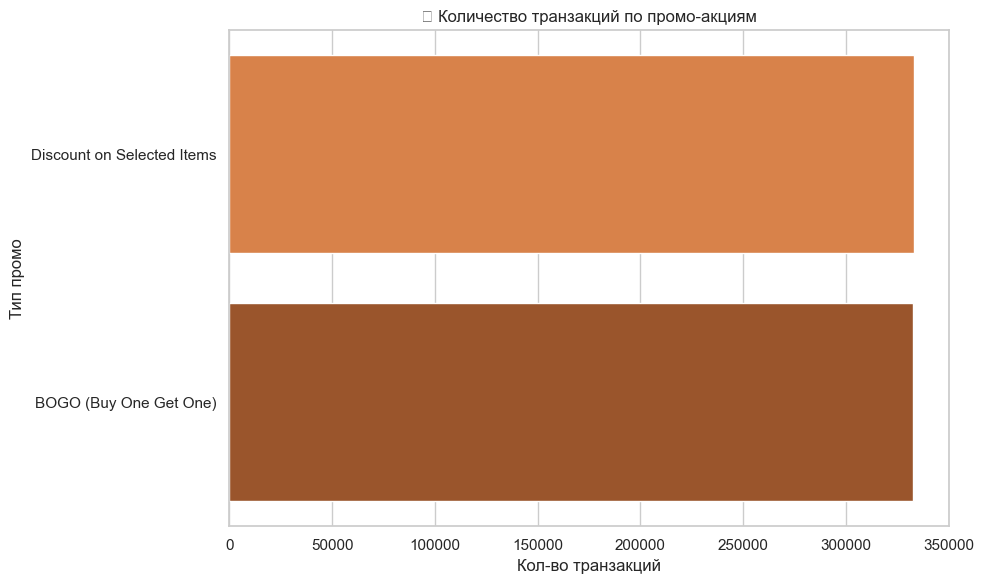

In [190]:
plt.figure(figsize=(10, 6))
sns.barplot(data=promo_summary.sort_values("transaction_count", ascending=False),
            x="transaction_count", y="Promotion", palette="Oranges_d")
plt.title("📊 Количество транзакций по промо-акциям")
plt.xlabel("Кол-во транзакций")
plt.ylabel("Тип промо")
plt.tight_layout()
plt.show()

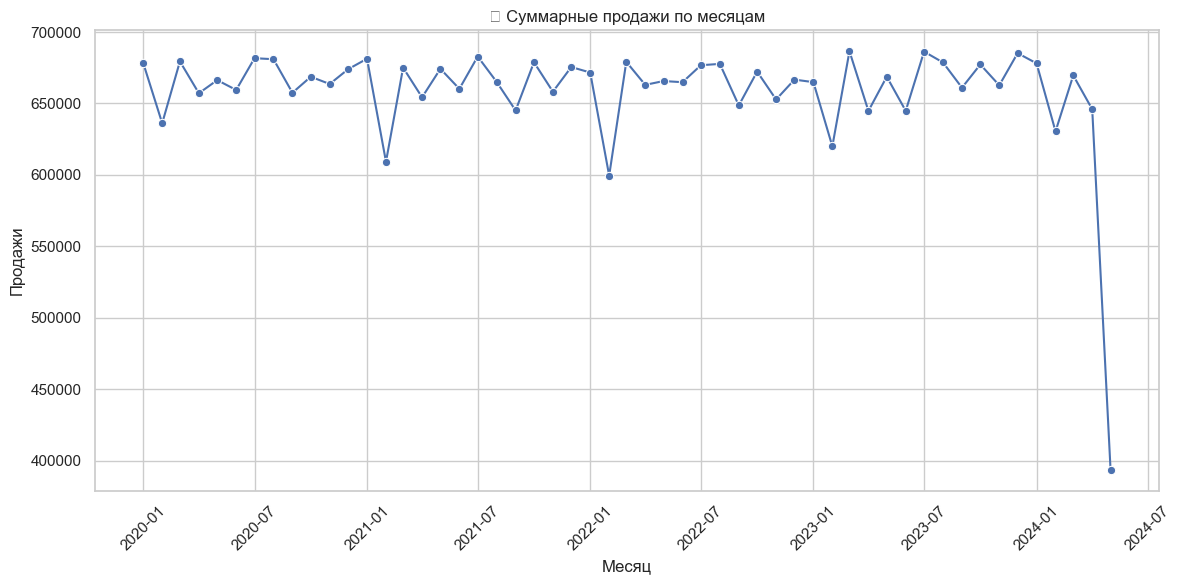

In [191]:
df["Month"] = df["Date"].dt.to_period("M").dt.to_timestamp()
monthly_sales = df.groupby("Month")["Total_Cost"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="Month", y="Total_Cost", marker="o")
plt.title("📈 Суммарные продажи по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

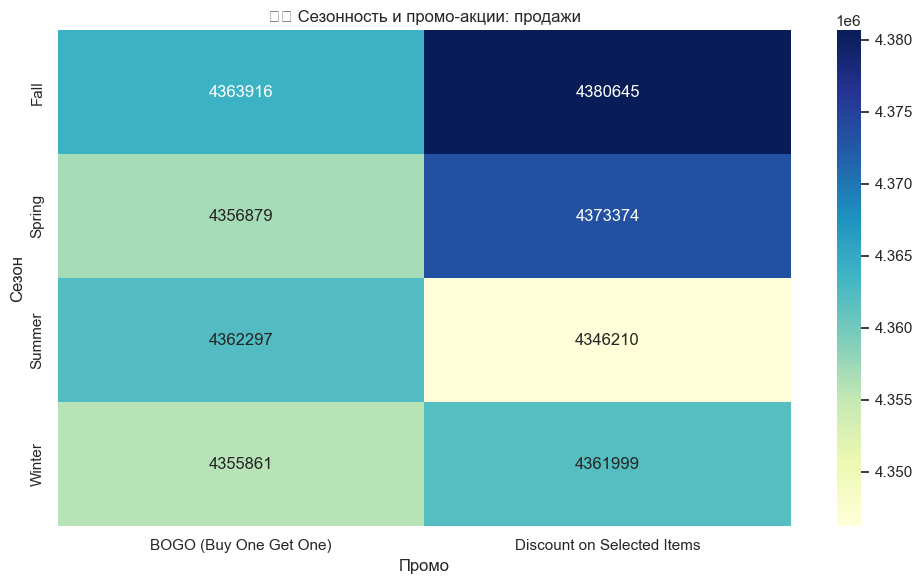

In [192]:
season_promo = df.groupby(["Season", "Promotion"])["Total_Cost"].sum().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(season_promo, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("🌤️ Сезонность и промо-акции: продажи")
plt.xlabel("Промо")
plt.ylabel("Сезон")
plt.tight_layout()
plt.show()

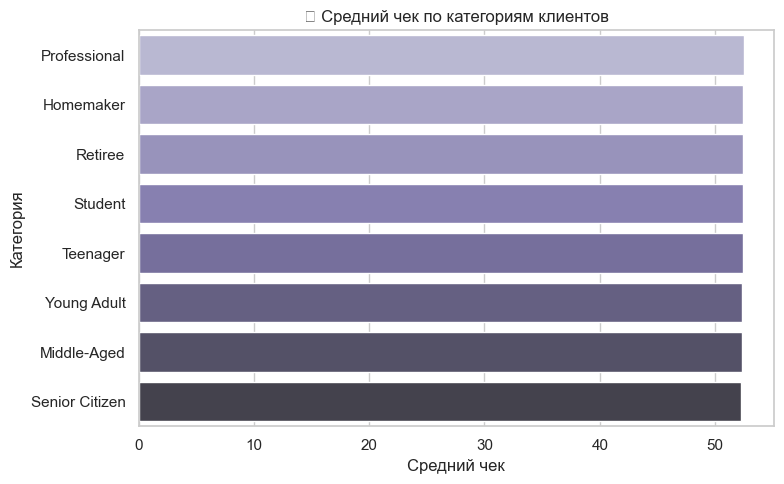

In [193]:
cust_cat_avg = df.groupby("Customer_Category")["Total_Cost"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=cust_cat_avg.values, y=cust_cat_avg.index, palette="Purples_d")
plt.title("👥 Средний чек по категориям клиентов")
plt.xlabel("Средний чек")
plt.ylabel("Категория")
plt.tight_layout()
plt.show()

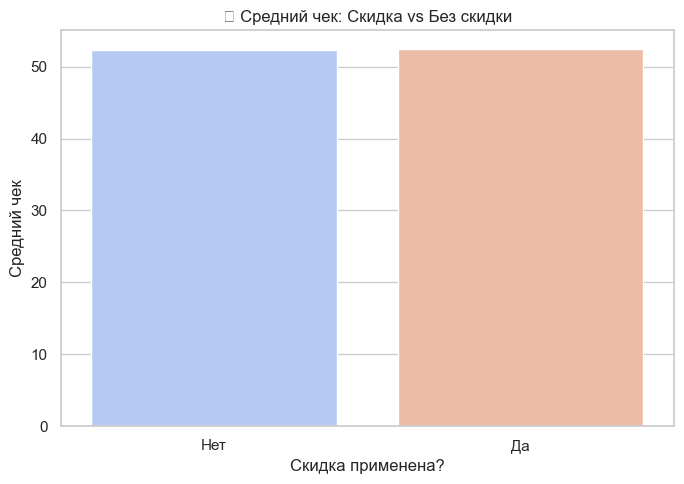

In [194]:
discount_compare = df.groupby("Discount_Applied")["Total_Cost"].agg(["mean", "count"]).reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(data=discount_compare, x="Discount_Applied", y="mean", palette="coolwarm")
plt.title("💸 Средний чек: Скидка vs Без скидки")
plt.xlabel("Скидка применена?")
plt.ylabel("Средний чек")
plt.xticks([0, 1], ["Нет", "Да"])
plt.tight_layout()
plt.show()

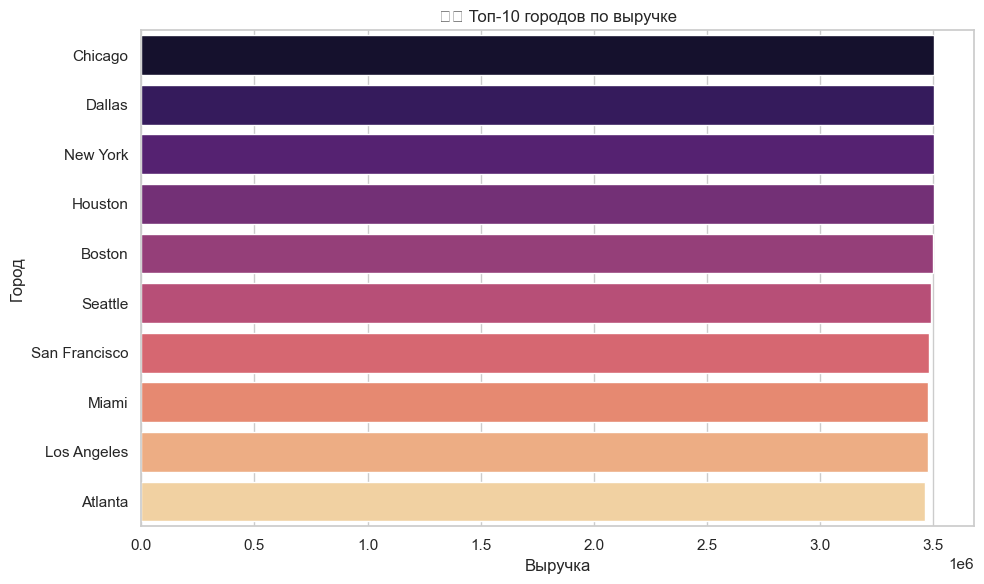

In [195]:
top_cities = df.groupby("City")["Total_Cost"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="magma")
plt.title("🏙️ Топ-10 городов по выручке")
plt.xlabel("Выручка")
plt.ylabel("Город")
plt.tight_layout()
plt.show()

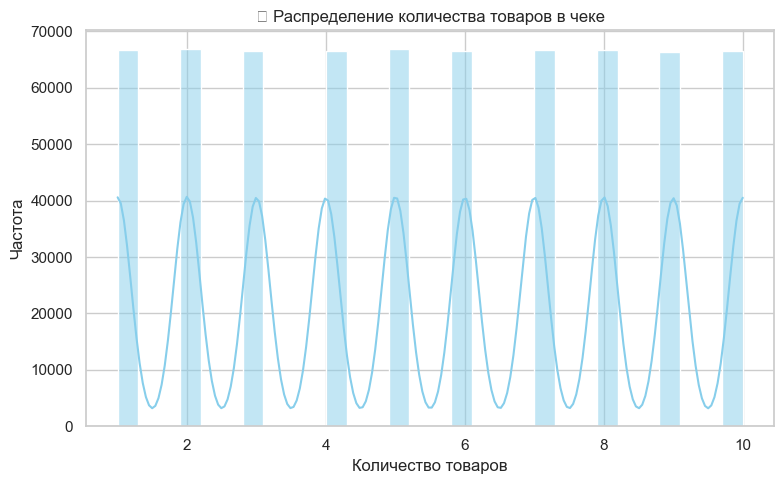

In [196]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Total_Items"], bins=30, kde=True, color="skyblue")
plt.title("📦 Распределение количества товаров в чеке")
plt.xlabel("Количество товаров")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()

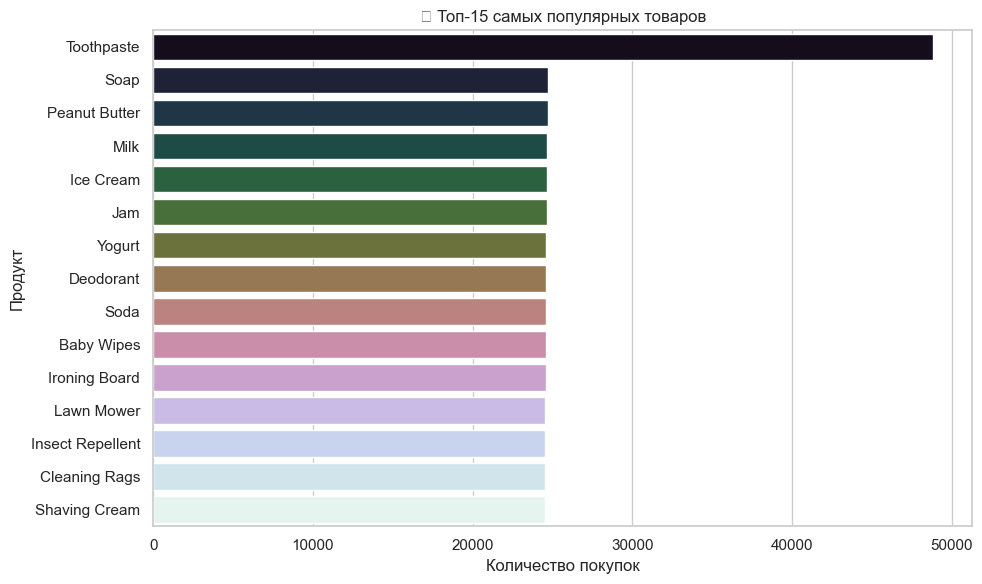

In [ ]:
df["Product_List"] = df["Product"].apply(ast.literal_eval)

product_counts = Counter()
df["Product_List"].apply(product_counts.update)

top_products = pd.DataFrame(product_counts.most_common(15), columns=["Product", "Count"])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x="Count", y="Product", palette="cubehelix")
plt.title("🛒 Топ-15 самых популярных товаров")
plt.xlabel("Количество покупок")
plt.ylabel("Продукт")
plt.tight_layout()
plt.show()

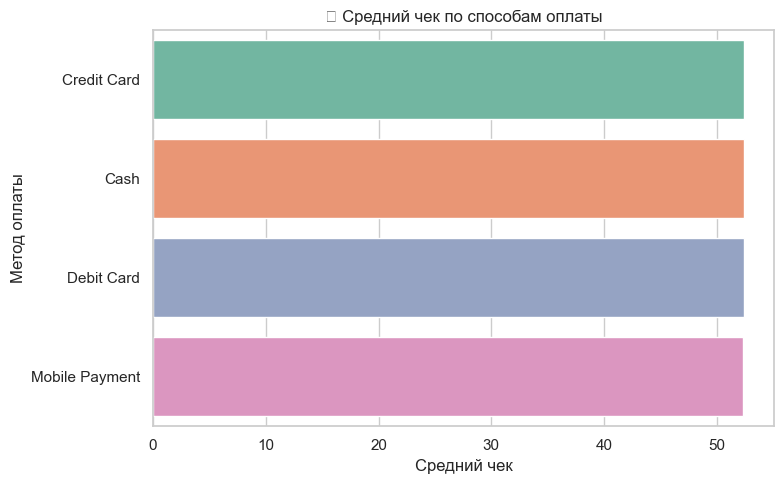

In [198]:
pay_avg = df.groupby("Payment_Method")["Total_Cost"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=pay_avg.values, y=pay_avg.index, palette="Set2")
plt.title("💳 Средний чек по способам оплаты")
plt.xlabel("Средний чек")
plt.ylabel("Метод оплаты")
plt.tight_layout()
plt.show()

In [ ]:
customer_df = df.groupby("Customer_Name").agg(
    total_spent=("Total_Cost", "sum"),
    avg_items=("Total_Items", "mean"),
    num_transactions=("Transaction_ID", "count"),
).reset_index()

features = ["total_spent", "avg_items", "num_transactions"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_df[features])

inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

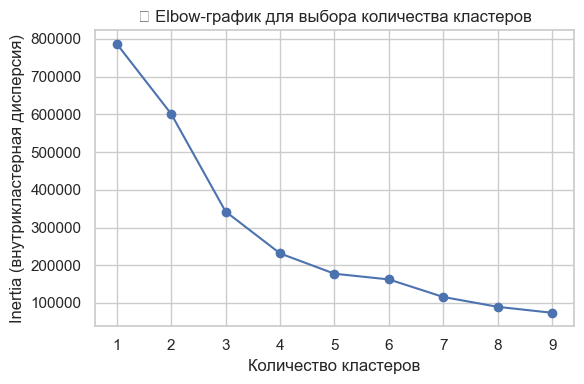

In [200]:
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o')
plt.title("🔍 Elbow-график для выбора количества кластеров")
plt.xlabel("Количество кластеров")
plt.ylabel("Inertia (внутрикластерная дисперсия)")
plt.grid(True)
plt.tight_layout()
plt.show()

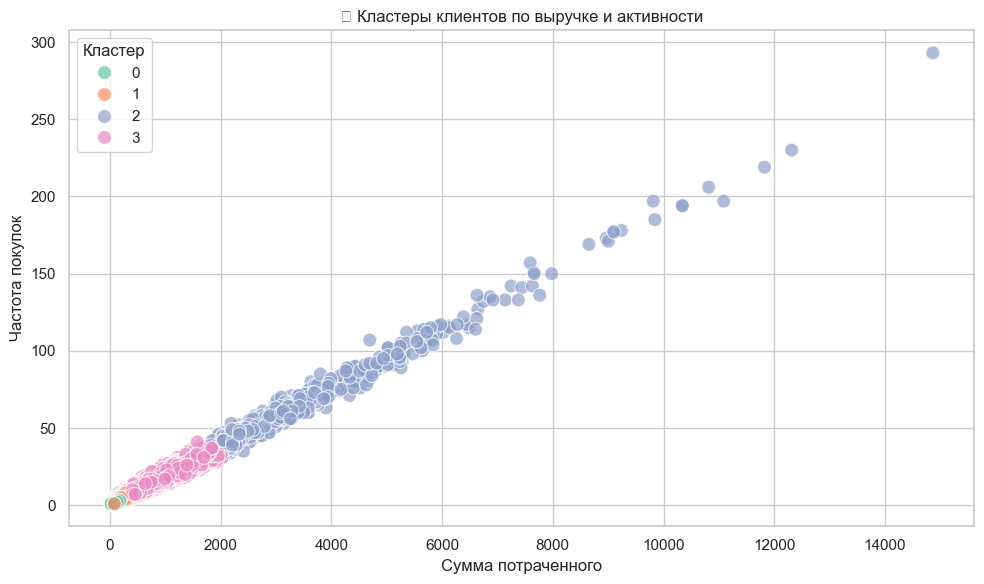

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df["Cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_df,
    x="total_spent",
    y="num_transactions",
    hue="Cluster",
    palette="Set2",
    s=100,
    alpha=0.7
)
plt.title("👥 Кластеры клиентов по выручке и активности")
plt.xlabel("Сумма потраченного")
plt.ylabel("Частота покупок")
plt.legend(title="Кластер")
plt.tight_layout()
plt.show()

In [202]:
cluster_summary = customer_df.groupby("Cluster")[features].mean().round(2)
print(cluster_summary)

         total_spent  avg_items  num_transactions
Cluster                                          
0              92.71       3.37              1.78
1              95.02       7.52              1.83
2            3168.41       5.47             60.18
3             695.60       5.49             13.04


In [ ]:
# df["Product_Count"] = df["Product"].apply(lambda x: len(eval(x)))

# np.random.seed(42)

# def simulate_total_cost(row):
#     base = row["Product_Count"] * np.random.uniform(3, 20)
    
#     if row["Season"] == "Winter":
#         base *= 1.2
#     elif row["Season"] == "Summer":
#         base *= 0.9
    
#     if row["Customer_Category"] == "Professional":
#         base *= 1.4
#     elif row["Customer_Category"] == "Student":
#         base *= 0.7
#     elif row["Customer_Category"] == "Retiree":
#         base *= 1.1

#     if row["Store_Type"] == "Supermarket":
#         base *= 1.5
#     elif row["Store_Type"] == "Convenience Store":
#         base *= 0.8

#     if row["Promotion"] != "None":
#         base *= np.random.uniform(0.7, 0.95)

#     noise = np.random.normal(0, 5)
#     return max(base + noise, 1)

# df["Total_Cost"] = df.apply(simulate_total_cost, axis=1)

# df["Total_Items"] = df["Product_Count"] + np.random.randint(-1, 2, size=len(df))
# df["Total_Items"] = df["Total_Items"].clip(lower=1)

In [204]:
df = pd.read_csv(DATASET_PATH)

In [ ]:
numeric_cols = df.select_dtypes(include='number')

np.random.seed(42)

def add_random_spikes(series, spike_prob=0.05, spike_min=0.1, spike_max=3.0):
    values = series.values.astype(float)
    spikes = np.random.rand(len(values)) < spike_prob
    multipliers = np.random.uniform(spike_min, spike_max, size=len(values))
    directions = np.random.choice([0.5, 1.5, 2, 3, 0.3, 0.1], size=len(values))
    
    for i in range(len(values)):
        if spikes[i]:
            multiplier = multipliers[i]
            if np.random.rand() < 0.5:
                multiplier = 1 + multiplier
            else:
                multiplier = max(spike_min, 1 - multiplier)
            values[i] = values[i] * multiplier
    
    if series.name == "Total_Items":
        values = np.clip(values, 1, None)
    elif series.name == "Total_Cost":
        values = np.clip(values, 0, None)
    
    return pd.Series(values, index=series.index)

for col in numeric_cols:
    df[col] = add_random_spikes(df[col])

In [206]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

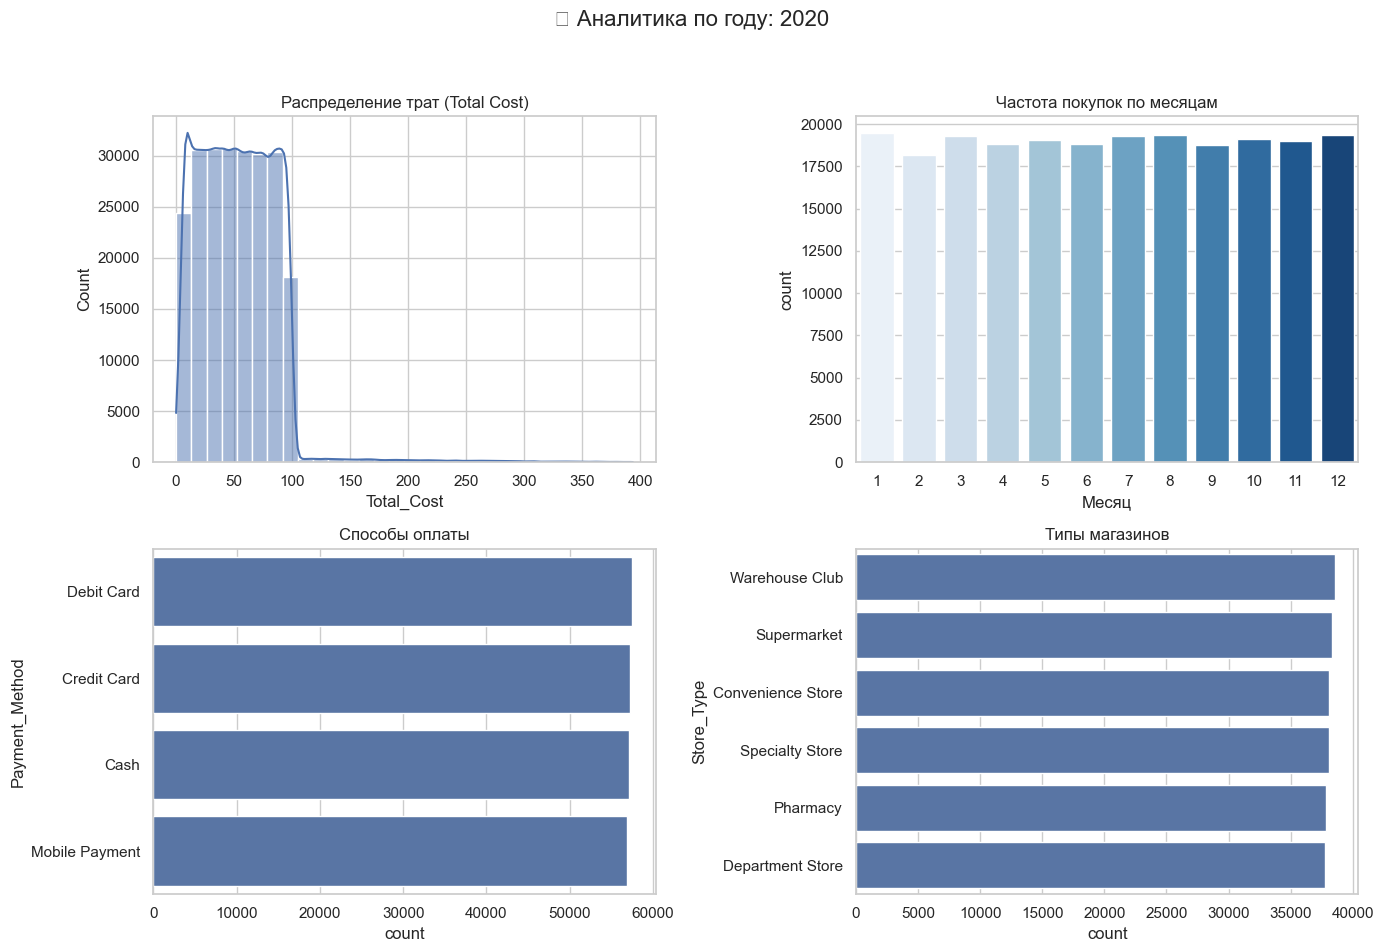

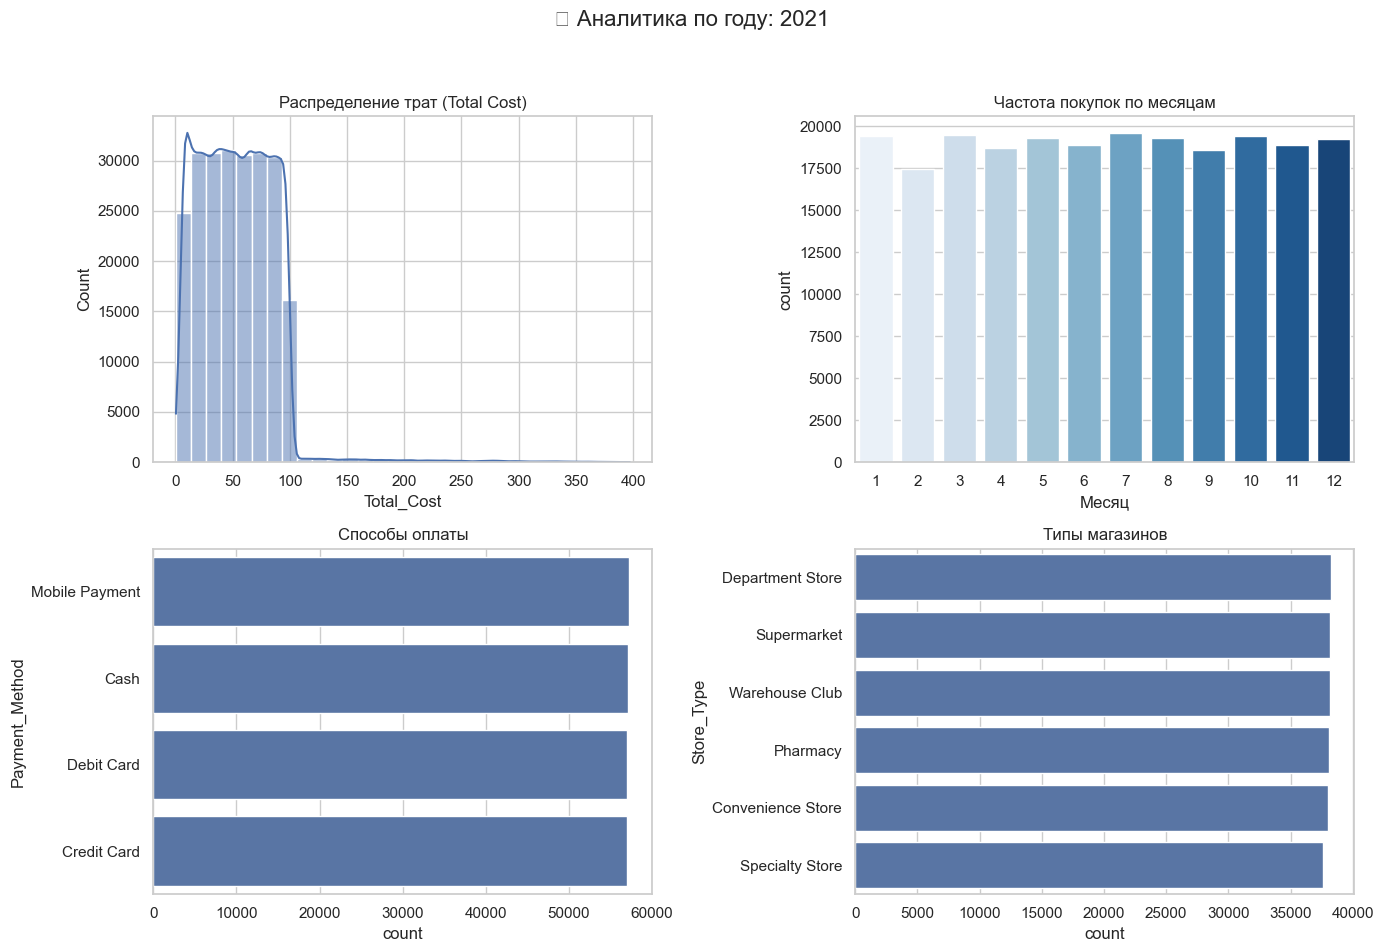

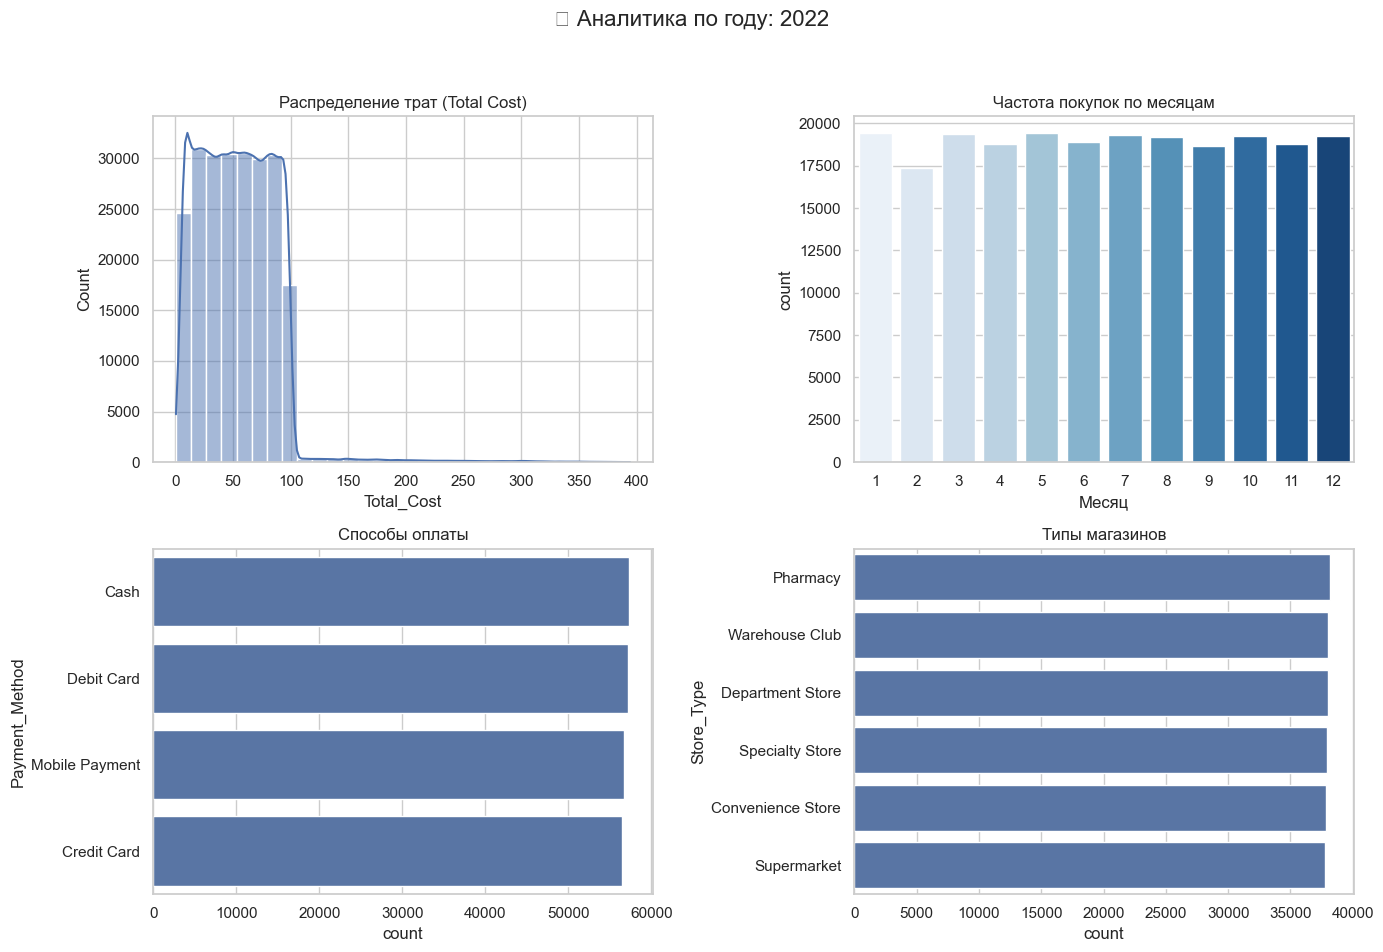

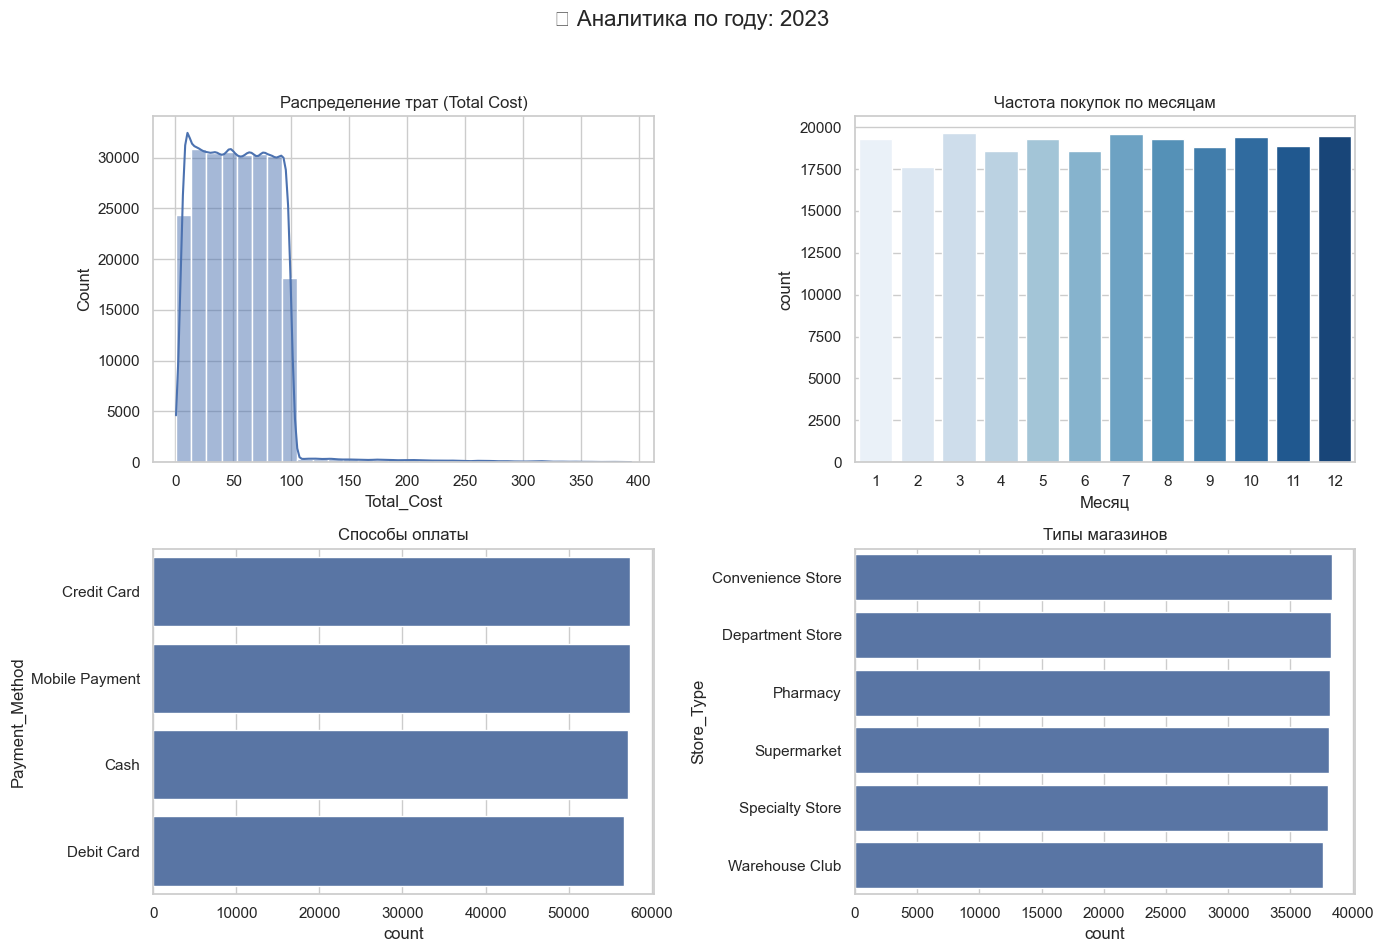

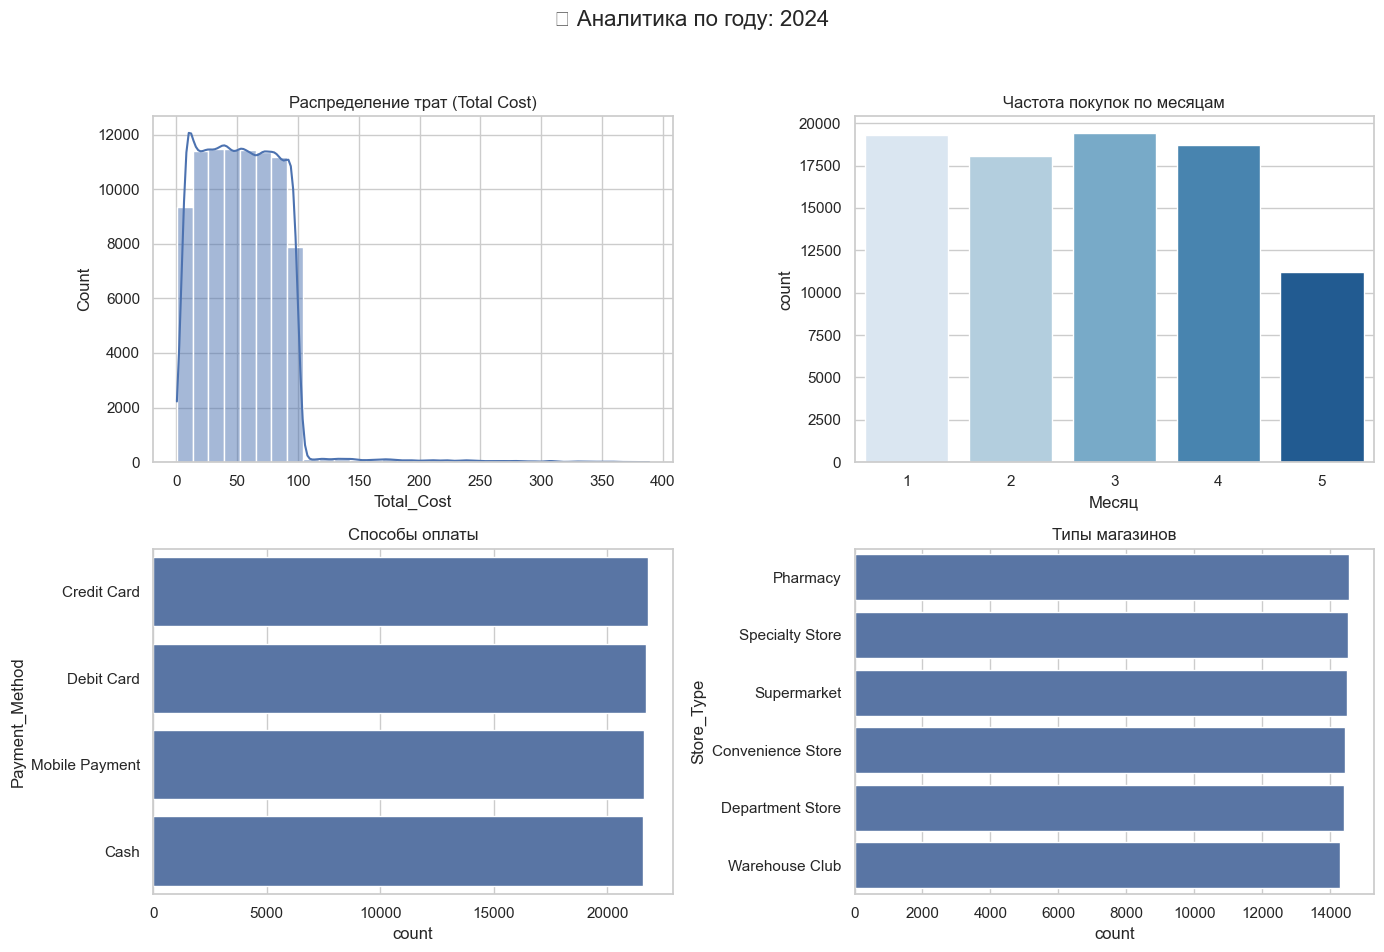

In [ ]:
df["Year"] = df["Date"].dt.year

years = sorted(df["Year"].unique())

sns.set(style="whitegrid")

for year in years:
    df_year = df[df["Year"] == year]
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f"📊 Аналитика по году: {year}", fontsize=16)

    sns.histplot(df_year["Total_Cost"], bins=30, kde=True, ax=axes[0, 0])
    axes[0, 0].set_title("Распределение трат (Total Cost)")

    df_year["Month"] = df_year["Date"].dt.month
    sns.countplot(x="Month", data=df_year, ax=axes[0, 1], palette="Blues")
    axes[0, 1].set_title("Частота покупок по месяцам")
    axes[0, 1].set_xlabel("Месяц")

    sns.countplot(y="Payment_Method", data=df_year, order=df_year["Payment_Method"].value_counts().index, ax=axes[1, 0])
    axes[1, 0].set_title("Способы оплаты")

    sns.countplot(y="Store_Type", data=df_year, order=df_year["Store_Type"].value_counts().index, ax=axes[1, 1])
    axes[1, 1].set_title("Типы магазинов")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()